EDA of Bike sharing compony

In [39]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches 

df1=pd.read_csv('day.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [40]:
df1

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [41]:
df1['dteday']=pd.to_datetime(df1['dteday'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Plot correlation matrix

/var/folders/nm/btrww2_94pncl34mb0yt49j80000gn/T/ipykernel_85531/345592824.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/nm/btrww2_94pncl34mb0yt49j80000gn/T/ipykernel_85531/345592824.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/var/folders/nm/btrww2_94pncl34mb0yt49j80000gn/T/ipykernel_85531/345592824.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify 

<AxesSubplot: >

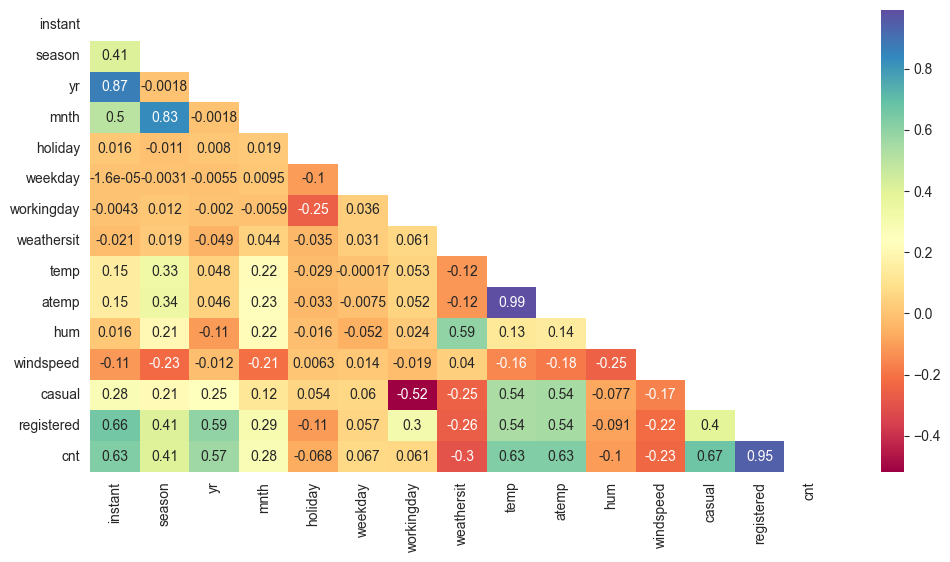

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(df1.corr(), dtype=np.bool))

sns.heatmap(df1.corr(),cmap='Spectral', mask=mask , annot=True)


Convert some Features to categorical Features to ease the EDA

In [43]:
df1.loc[df1['season'] ==1,'season']='Winter'
df1.loc[df1['season'] ==2,'season']='Spring'
df1.loc[df1['season'] ==3,'season']= 'Summer'
df1.loc[df1['season'] ==4,'season']= 'Fall'
df1.loc[df1['holiday'] ==0, 'holiday'] ='No'
df1.loc[df1['holiday'] ==1, 'holiday'] ='Yes'
df1.loc[df1['weathersit']==1,'weathersit']='Clear'
df1.loc[df1['weathersit']==2,'weathersit']='Mist'
df1.loc[df1['weathersit']==3,'weathersit']='Light rain'
df1.loc[df1['weathersit']==4,'weathersit']='Heavy rain'
df1['season']=pd.Categorical(df1['season'], categories=['Winter','Spring','Summer','Fall'])
df1['holiday']=pd.Categorical(df1['holiday'], categories=['No','Yes'])
df1['weathersit']=pd.Categorical(df1['weathersit'], categories=['Clear','Mist','Light rain','Heavy rain'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(3), datetime64

In [44]:
df1['is_weekend']=np.where((df1['workingday'] == 0), 'Yes', 'No')


In [45]:
df1.describe()

instant          yr        mnth     weekday  workingday        temp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    0.500684    6.519836    2.997264    0.683995    0.495385   
std    211.165812    0.500342    3.451913    2.004787    0.465233    0.183051   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.059130   
25%    183.500000    0.000000    4.000000    1.000000    0.000000    0.337083   
50%    366.000000    1.000000    7.000000    3.000000    1.000000    0.498333   
75%    548.500000    1.000000   10.000000    5.000000    1.000000    0.655417   
max    731.000000    1.000000   12.000000    6.000000    1.000000    0.861667   

            atemp         hum   windspeed       casual   registered  \
count  731.000000  731.000000  731.000000   731.000000   731.000000   
mean     0.474354    0.627894    0.190486   848.176471  3656.172367   
std      0.162961    0.142429    0.077498   686.622488  1560.256377   
min      0.079070    0.000000    0.022392     2.000000    20.000000   
25%      0.337842    0.520000    0.134950   315.500000  2497.000000   
50%      0.486733    0.626667    0.180975   713.000000  3662.000000   
75%      0.608602    0.730209    0.233214  1096.000000  4776.500000   
max      0.840896    0.972500    0.507463  3410.000000  6946.000000   

               cnt  
count   731.000000  
mean   4504.348837  
std    1937.211452  
min      22.000000  
25%    3152.000000  
50%    4548.000000  
75%    5956.000000  
max    8714.000000

Converting temp and etemp to the real Temperature. Temp and atemp are calculated by the following equation: 
temp= (t-t_min)/(t_max-t_min), t_min=-8, t_max=+30
atemp=(t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 

In [46]:
t_max_t=39
t_min_t=-8
t_max_ta=50
t_min_ta=-16
df1['real_temp']=(df1['temp']*(t_max_t-t_min_t))+t_min_t
df1['real_atemp']=(df1['atemp']*(t_max_ta-t_min_ta))+t_min_ta
df1['real_hum']=df1['hum']*100
df1['real_windspeed']=df1['windspeed']*67
df1.describe()

instant          yr        mnth     weekday  workingday        temp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    0.500684    6.519836    2.997264    0.683995    0.495385   
std    211.165812    0.500342    3.451913    2.004787    0.465233    0.183051   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.059130   
25%    183.500000    0.000000    4.000000    1.000000    0.000000    0.337083   
50%    366.000000    1.000000    7.000000    3.000000    1.000000    0.498333   
75%    548.500000    1.000000   10.000000    5.000000    1.000000    0.655417   
max    731.000000    1.000000   12.000000    6.000000    1.000000    0.861667   

            atemp         hum   windspeed       casual   registered  \
count  731.000000  731.000000  731.000000   731.000000   731.000000   
mean     0.474354    0.627894    0.190486   848.176471  3656.172367   
std      0.162961    0.142429    0.077498   686.622488  1560.256377   
min      0.079070    0.000000    0.022392     2.000000    20.000000   
25%      0.337842    0.520000    0.134950   315.500000  2497.000000   
50%      0.486733    0.626667    0.180975   713.000000  3662.000000   
75%      0.608602    0.730209    0.233214  1096.000000  4776.500000   
max      0.840896    0.972500    0.507463  3410.000000  6946.000000   

               cnt   real_temp  real_atemp    real_hum  real_windspeed  
count   731.000000  731.000000  731.000000  731.000000      731.000000  
mean   4504.348837   15.283085   15.307363   62.789406       12.762576  
std    1937.211452    8.603397   10.755438   14.242910        5.192357  
min      22.000000   -5.220871  -10.781406    0.000000        1.500244  
25%    3152.000000    7.842925    6.297605   52.000000        9.041650  
50%    4548.000000   15.421651   16.124378   62.666700       12.125325  
75%    5956.000000   22.804575   24.167732   73.020850       15.625371  
max    8714.000000   32.498349   39.499136   97.250000       34.000021

Creating some new Features

In [47]:
df1['windy_day']=np.where(df1['real_windspeed'] > 30, 'yes', 'no')
df1['hot_day']=np.where(df1['real_atemp'] > 32, 'yes', 'no')
df1['high_hum']=np.where(df1['real_hum'] > 60, 'yes', 'no')


In [48]:
df1['windy_day']=pd.Categorical(df1['windy_day'], categories=['yes','no'])
df1['hot_day']=pd.Categorical(df1['hot_day'], categories=['yes','no'])
df1['high_hum']=pd.Categorical(df1['high_hum'], categories=['yes','no'])
df1['month']=pd.DatetimeIndex(df1['dteday']).month
df1['year']=[d.year for d in df1.dteday]


df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   instant         731 non-null    int64         
 1   dteday          731 non-null    datetime64[ns]
 2   season          731 non-null    category      
 3   yr              731 non-null    int64         
 4   mnth            731 non-null    int64         
 5   holiday         731 non-null    category      
 6   weekday         731 non-null    int64         
 7   workingday      731 non-null    int64         
 8   weathersit      731 non-null    category      
 9   temp            731 non-null    float64       
 10  atemp           731 non-null    float64       
 11  hum             731 non-null    float64       
 12  windspeed       731 non-null    float64       
 13  casual          731 non-null    int64         
 14  registered      731 non-null    int64         
 15  cnt   

In [49]:
df1

instant     dteday  season  yr  mnth holiday  weekday  workingday  \
0          1 2011-01-01  Winter   0     1      No        6           0   
1          2 2011-01-02  Winter   0     1      No        0           0   
2          3 2011-01-03  Winter   0     1      No        1           1   
3          4 2011-01-04  Winter   0     1      No        2           1   
4          5 2011-01-05  Winter   0     1      No        3           1   
..       ...        ...     ...  ..   ...     ...      ...         ...   
726      727 2012-12-27  Winter   1    12      No        4           1   
727      728 2012-12-28  Winter   1    12      No        5           1   
728      729 2012-12-29  Winter   1    12      No        6           0   
729      730 2012-12-30  Winter   1    12      No        0           0   
730      731 2012-12-31  Winter   1    12      No        1           1   

    weathersit      temp  ...  is_weekend  real_temp  real_atemp  real_hum  \
0         Mist  0.344167  ...         Yes   8.175849    7.999250   80.5833   
1         Mist  0.363478  ...         Yes   9.083466    7.346774   69.6087   
2        Clear  0.196364  ...          No   1.229108   -3.499270   43.7273   
3        Clear  0.200000  ...          No   1.400000   -1.999948   59.0435   
4        Clear  0.226957  ...          No   2.666979   -0.868180   43.6957   
..         ...       ...  ...         ...        ...         ...       ...   
726       Mist  0.254167  ...          No   3.945849   -1.041628   65.2917   
727       Mist  0.253333  ...          No   3.906651    0.833036   59.0000   
728       Mist  0.253333  ...         Yes   3.906651   -0.001600   75.2917   
729      Clear  0.255833  ...         Yes   4.024151   -0.707800   48.3333   
730       Mist  0.215833  ...          No   2.144151   -1.249858   57.7500   

     real_windspeed  windy_day hot_day  high_hum  month  year  
0         10.749882         no      no       yes      1  2011  
1         16.652113         no      no       yes      1  2011  
2         16.636703         no      no        no      1  2011  
3         10.739832         no      no        no      1  2011  
4         12.522300         no      no        no      1  2011  
..              ...        ...     ...       ...    ...   ...  
726       23.458911         no      no       yes     12  2012  
727       10.416557         no      no        no     12  2012  
728        8.333661         no      no       yes     12  2012  
729       23.500518         no      no        no     12  2012  
730       10.374682         no      no        no     12  2012  

[731 rows x 26 columns]

Start of ploting 

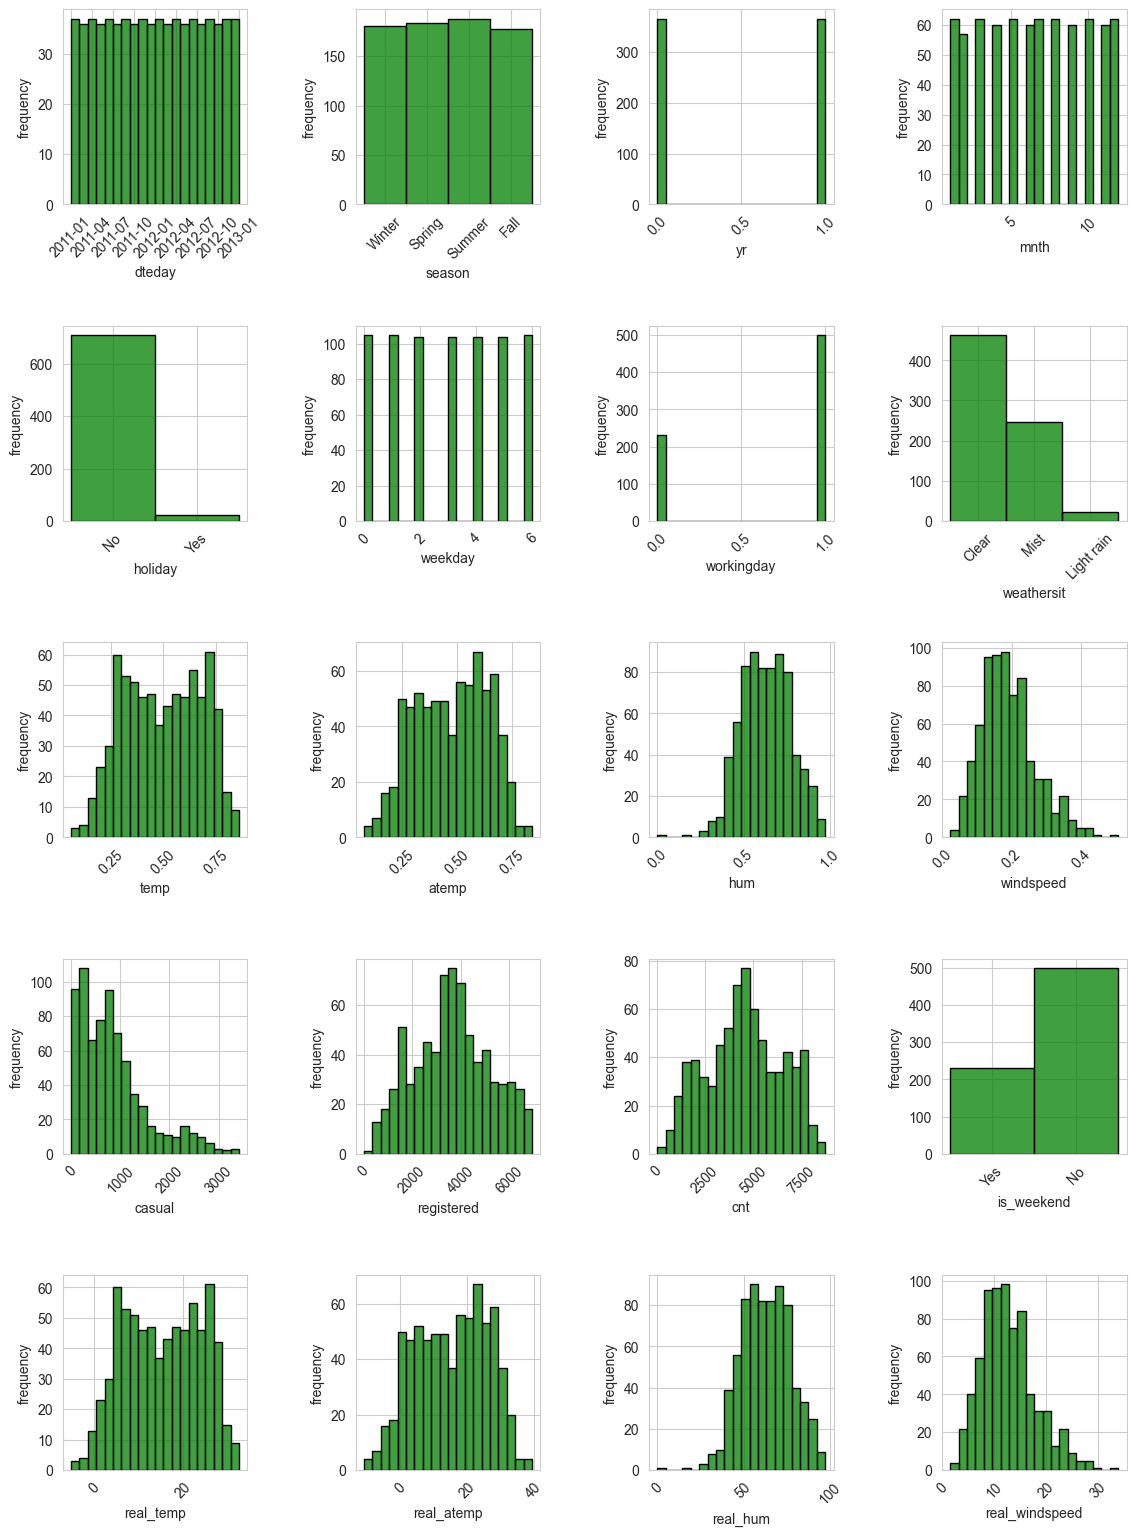

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

nrow = 5
ncolum=4
count=1
fig=plt.figure(figsize=(12,16))
for i in range(nrow):
    for j in range(ncolum):
        plt.subplot2grid((nrow,ncolum), (i,j))
        sns.histplot(df1[df1.columns[count]], bins=20, color='green',  edgecolor='black', linewidth=1.0)
        plt.ylabel('frequency')
        plt.xticks(rotation=45)
        count +=1

plt.tight_layout(pad=3)

Plot the time series

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning:

All-NaN axis encountered

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning:

All-NaN axis encountered



Text(0, 0.5, 'Total renter bikes')

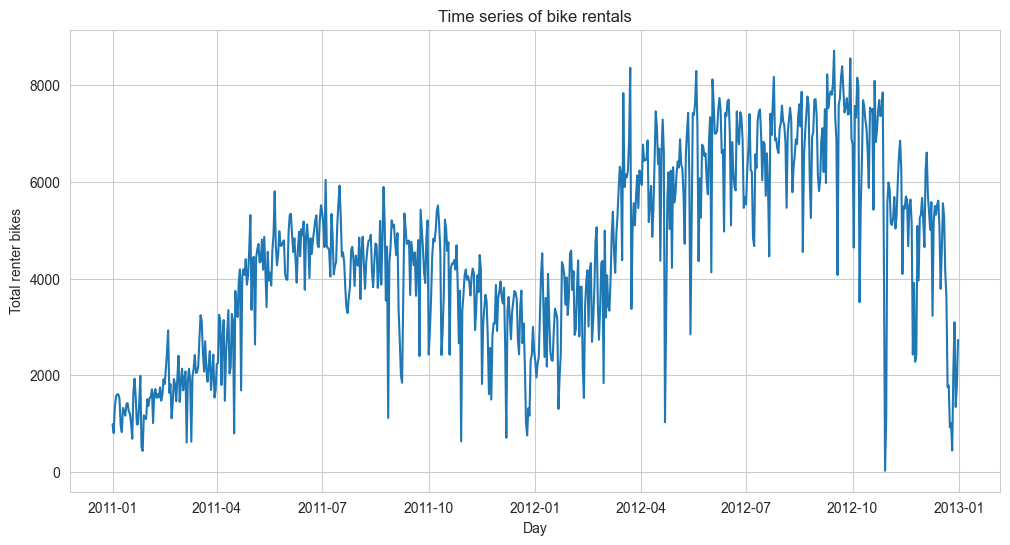

In [51]:

plt.figure(figsize=(12,6))
sns.lineplot(data=df1, x="dteday", y="cnt",  err_style="bars")

plt.title('Time series of bike rentals')
plt.xlabel('Day')
plt.ylabel('Total renter bikes')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning:

All-NaN axis encountered

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning:

All-NaN axis encountered



Text(0, 0.5, 'Rented bikes by registered users')

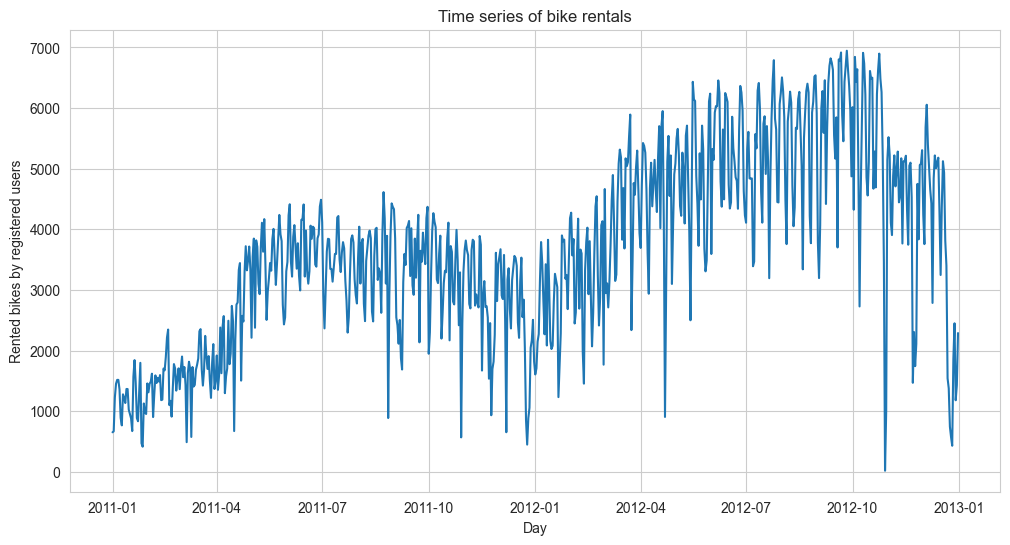

In [52]:


plt.figure(figsize=(12,6))
sns.lineplot(data=df1, x="dteday", y="registered",  err_style="bars")

plt.title('Time series of bike rentals')
plt.xlabel('Day')
plt.ylabel('Rented bikes by registered users')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning:

All-NaN axis encountered

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning:

All-NaN axis encountered



Text(0, 0.5, 'Rented bikes by casual users')

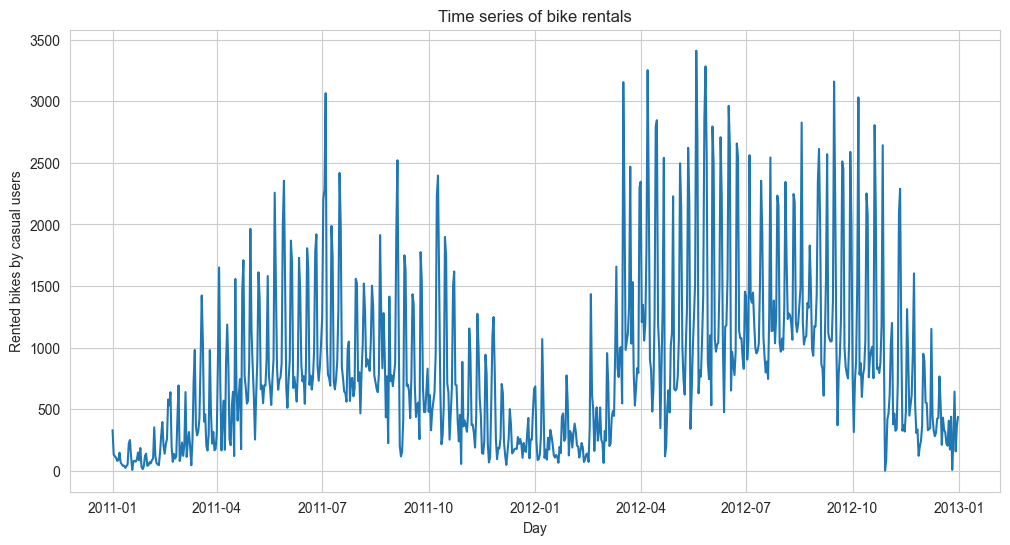

In [53]:

plt.figure(figsize=(12,6))
sns.lineplot(data=df1, x="dteday", y="casual",  err_style="bars")

plt.title('Time series of bike rentals')
plt.xlabel('Day')
plt.ylabel('Rented bikes by casual users')

Plot of season wise daily distribution of bike rentals

/var/folders/nm/btrww2_94pncl34mb0yt49j80000gn/T/ipykernel_85531/407727456.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



([<matplotlib.axis.XTick at 0x1338c8dc0>,
 [Text(0, 0, 'December'),
  Text(1, 0, 'January'),
  Text(2, 0, 'Febuary'),
  Text(3, 0, 'March'),
  Text(4, 0, 'April'),
  Text(5, 0, 'May'),
  Text(6, 0, 'June'),
  Text(7, 0, 'July'),
  Text(8, 0, 'August'),
  Text(9, 0, 'September'),
  Text(10, 0, 'October'),
  Text(11, 0, 'November')])

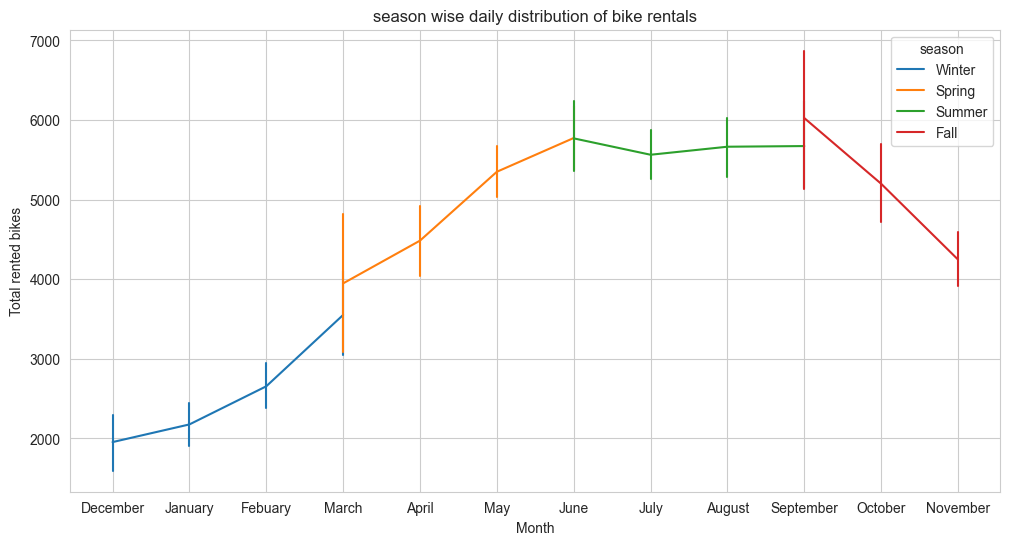

In [54]:

plt.figure(figsize=(12,6))
df_d=df1
df_d['mnth'][df_d['mnth']==12]=df_d['mnth'][df_d['mnth']==12].replace(12, 0)
df_d=df_d.drop(df_d['mnth'][(df_d['mnth']==0) &(df_d['season'] == 'Fall')].index)
sns.lineplot(data=df_d, x="mnth", y="cnt", hue="season", err_style="bars")

plt.title('season wise daily distribution of bike rentals')
plt.xlabel('Month')
plt.ylabel('Total rented bikes')
plt.xticks(range(0,12), labels=['December', 'January','Febuary','March','April','May','June','July','August','September','October','November'])



Plot of "relation between weather and monthly usage of bike rentals"

([<matplotlib.axis.XTick at 0x133957580>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'Febuary'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

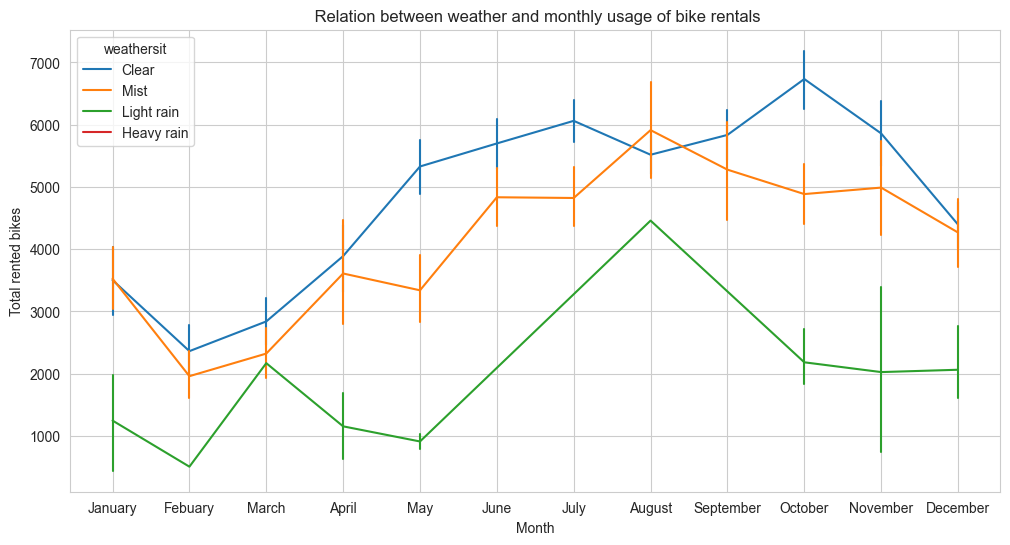

In [55]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df1, x="mnth", y="cnt", hue="weathersit", err_style="bars")
plt.title(' Relation between weather and monthly usage of bike rentals')
plt.xlabel('Month')
plt.ylabel('Total rented bikes')
plt.xticks(range(0,12), labels=['January','Febuary','March','April','May','June','July','August','September','October','November', 'December'])


Plot of "relation between casual and registered users with bike rentals"

([<matplotlib.axis.XTick at 0x133a28fa0>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'Febuary'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

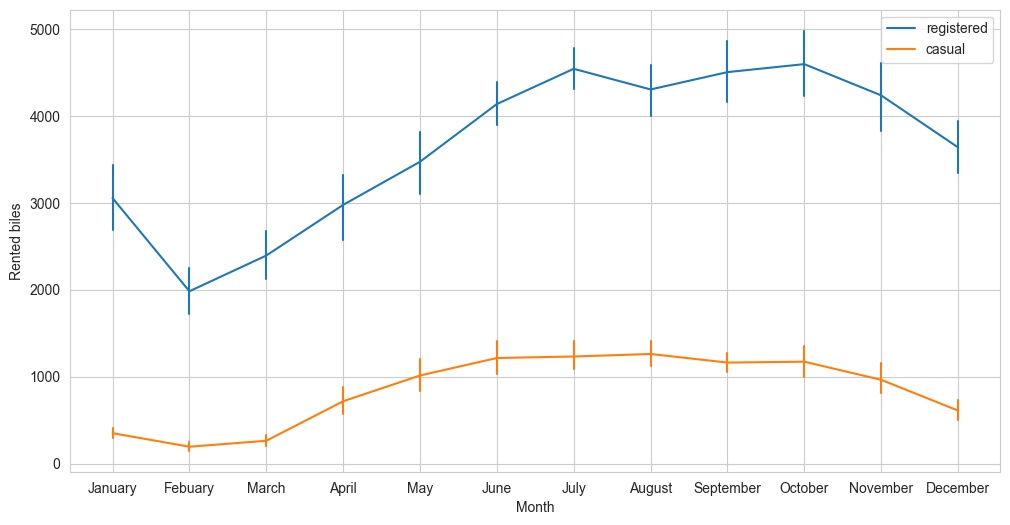

In [56]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df1, x="mnth", y="registered", err_style="bars")
sns.lineplot(data=df1, x="mnth", y="casual", err_style="bars")
plt.legend(['registered','casual'])
plt.xlabel('Month')
plt.ylabel('Rented biles')
plt.xticks(range(0,12), labels=['January','Febuary','March','April','May','June','July','August','September','October','November', 'December'])


Plot of relations between high humidity and bike rentals

([<matplotlib.axis.XTick at 0x133acd240>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'Febuary'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

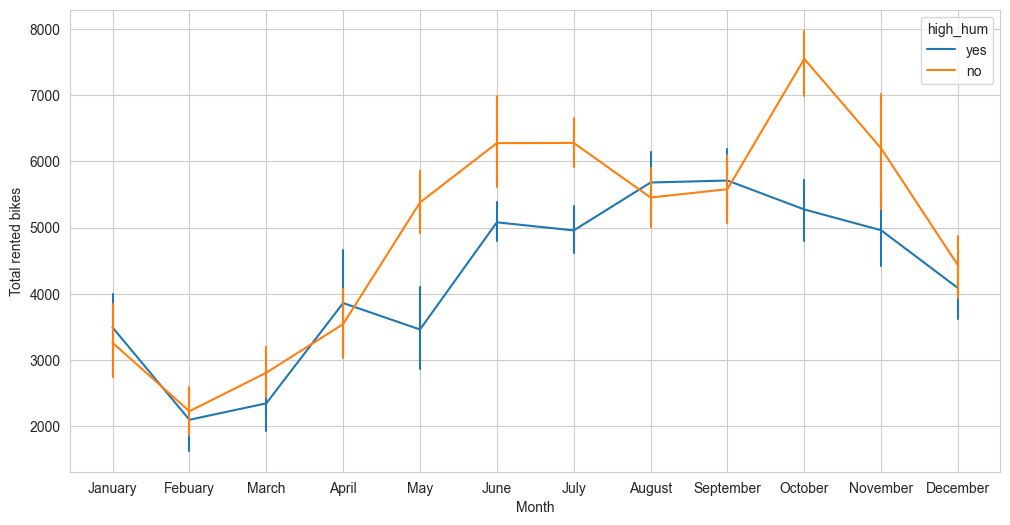

In [57]:
plt.figure(figsize=(12,6))

sns.lineplot(data=df1,x='mnth',y='cnt',hue='high_hum', err_style="bars")
plt.xlabel('Month')
plt.ylabel('Total rented bikes')
plt.xticks(range(0,12), labels=['January','Febuary','March','April','May','June','July','August','September','October','November', 'December'])


Histograms of casual and registered users

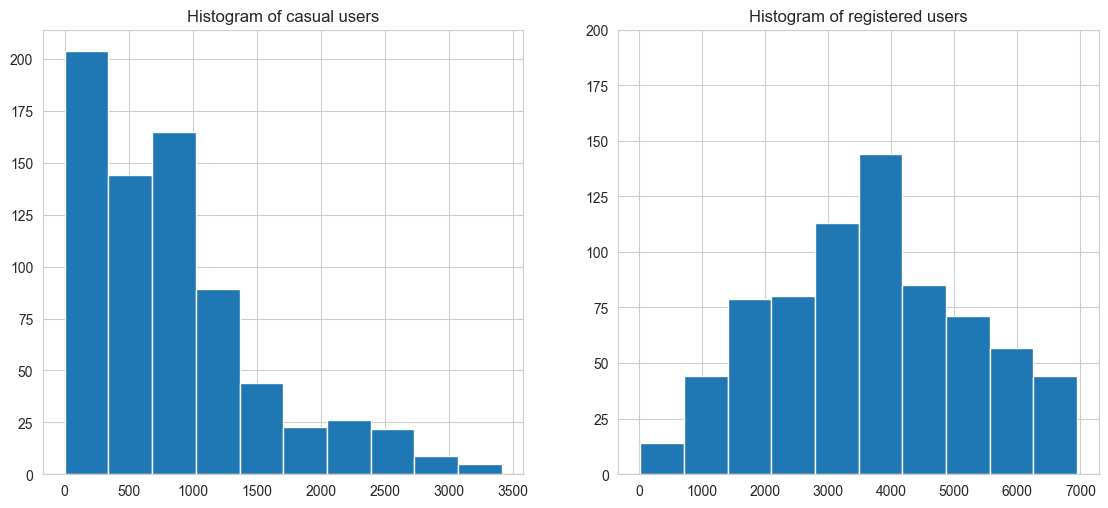

In [58]:
plt.figure(figsize=((12,6)))
plt.subplot2grid((1,2),(0,0))
plt.hist(df1['casual'])
plt.title('Histogram of casual users')
plt.subplot2grid((1,2),(0,1))
plt.title('Histogram of registered users')
#plt.xticks(range(0,800,100))
plt.hist(df1['registered'])
plt.ylim(0,200)
plt.tight_layout(pad=4)

Histogram of montly bike rentals for both years

([<matplotlib.axis.XTick at 0x133c8b400>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'Febuary'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

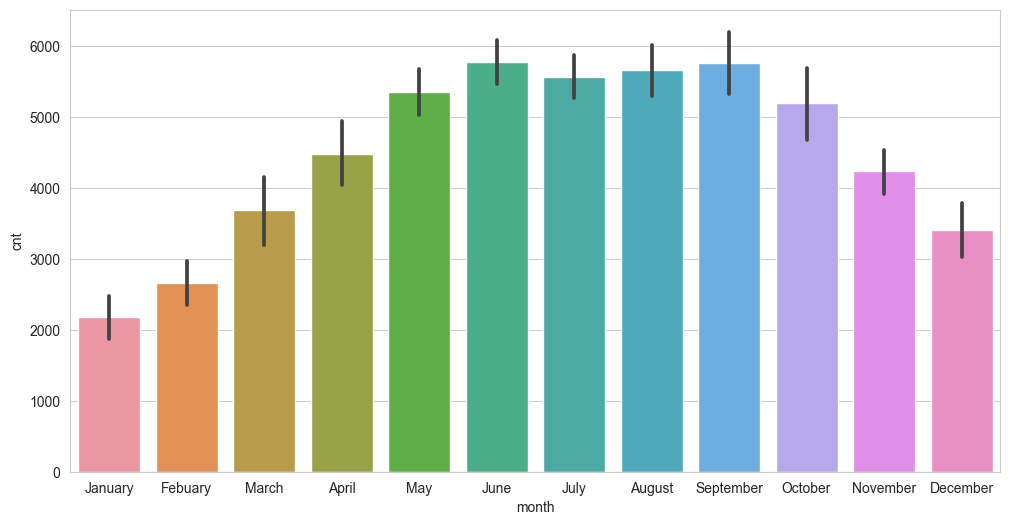

In [59]:
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1, x='month',y='cnt',estimator=np.mean)
plt.xticks(range(0,12), labels=['January','Febuary','March','April','May','June','July','August','September','October','November', 'December'])


In [60]:
df1['cnt'][df1['month']==12].mean()


3403.8064516129034

Histogram of montly bike rentals for the first year

([<matplotlib.axis.XTick at 0x133d27970>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'Febuary'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

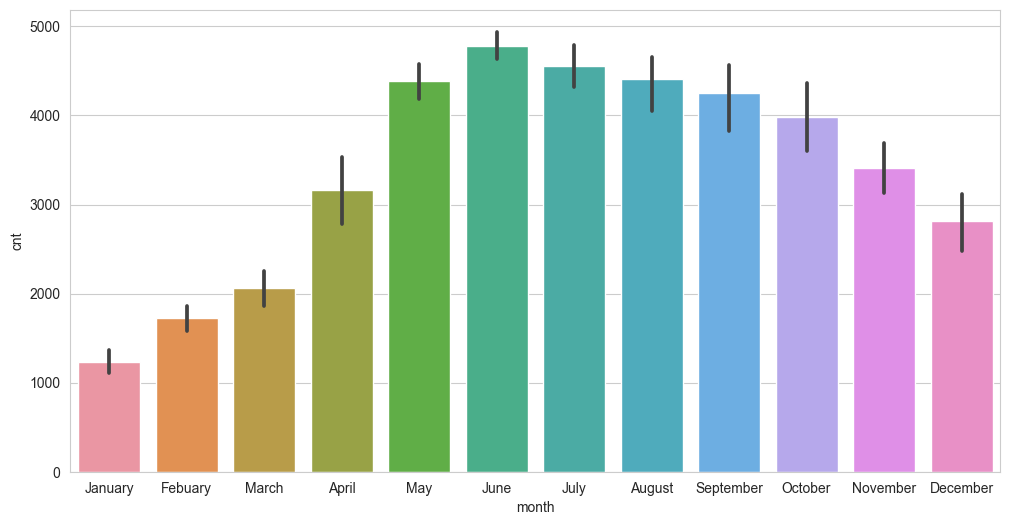

In [61]:
fig=plt.figure(figsize=(12,6))

sns.barplot(data=df1[df1['yr']==0], x='month',y='cnt',estimator=np.mean)
plt.xticks(range(0,12), labels=['January','Febuary','March','April','May','June','July','August','September','October','November', 'December'])


Time series of first month of the first year

Text(0, 0.5, 'Total rented bikes')

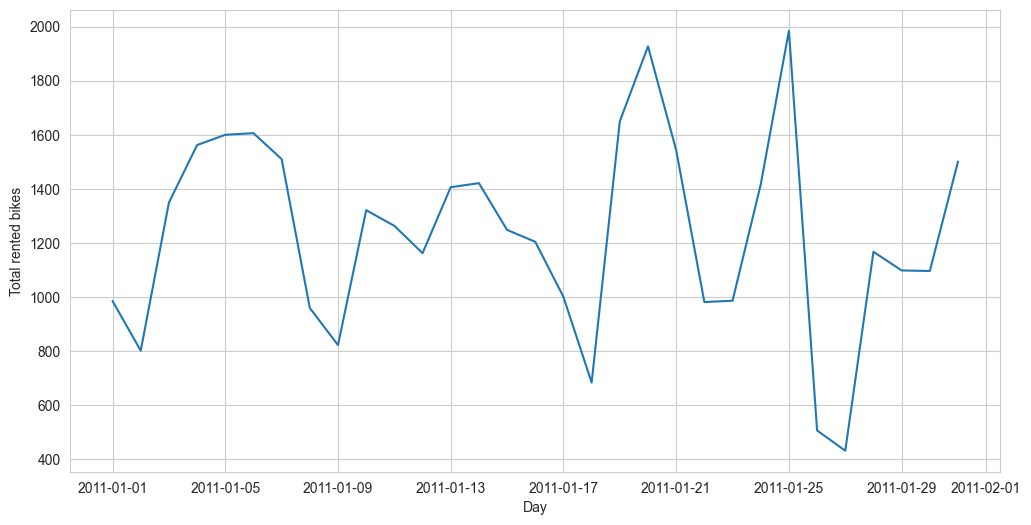

In [62]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df1['dteday'][(df1['yr']==0) & (df1['month']==1)],y=df1['cnt'][(df1['yr']==0) & (df1['month']==1)])
plt.xlabel('Day')
plt.ylabel('Total rented bikes')

Plot of all data of bike rentals during two years (interactive plot)

In [63]:
import plotly.express as px
fig = px.line(df1,'dteday','cnt')

fig.show()

Plot of all data of bike rentals during two years 

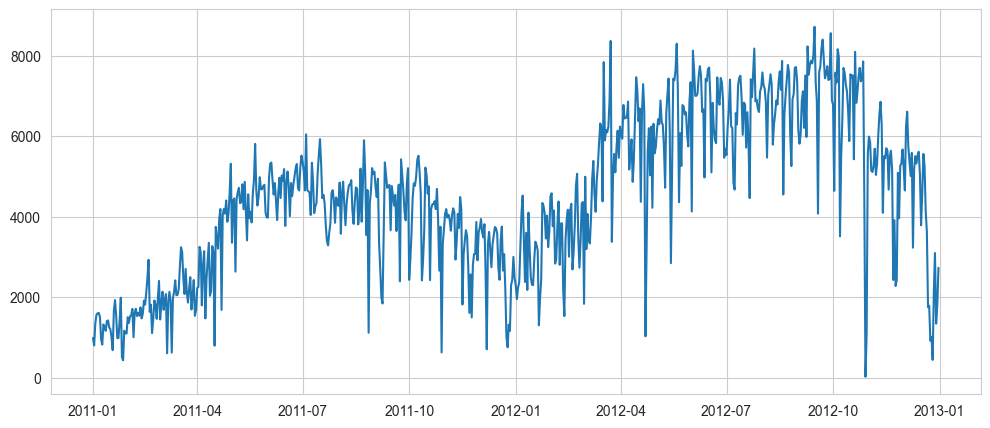

In [64]:
plt.figure(figsize=(12,5))
plt.plot(df1['dteday'],df1['cnt'])

Plot of relation between temperature, humidity and number of bike rentals

In [65]:
import plotly.express as px
#lables={x_n: "cnt",y_n: "real_temp"}
fig = px.scatter(df1, x='real_hum', y='real_temp', color='cnt', size= 'cnt' , size_max=15, opacity=1, labels={'real_temp':'Temperature (c°)', 'real_hum': 'Humidity (%)','cnt': 'Number of rented bikes'})


fig.show()

In [66]:
import plotly.express as px
#lables={x_n: "cnt",y_n: "real_temp"}
fig = px.scatter(df1, x='real_hum', y='real_temp', color='registered', size= 'registered' , size_max=15, opacity=1, labels={'real_temp':'Temperature (c°)', 'real_hum': 'Humidity (%)','cnt': 'Number of rented bikes'})


fig.show()

In [67]:
import plotly.express as px
#lables={x_n: "cnt",y_n: "real_temp"}
fig = px.scatter(df1, x='real_hum', y='real_temp', color='casual', size= 'casual' , size_max=15, opacity=1, labels={'real_temp':'Temperature (c°)', 'real_hum': 'Humidity (%)','casual': 'Casual'})


fig.show()

Plot of monthly analysis of rental bikes in years 2011 and 2012

Text(0.5, 1.0, 'Monthly analysis of rental bikes in years 2011 and 2012')

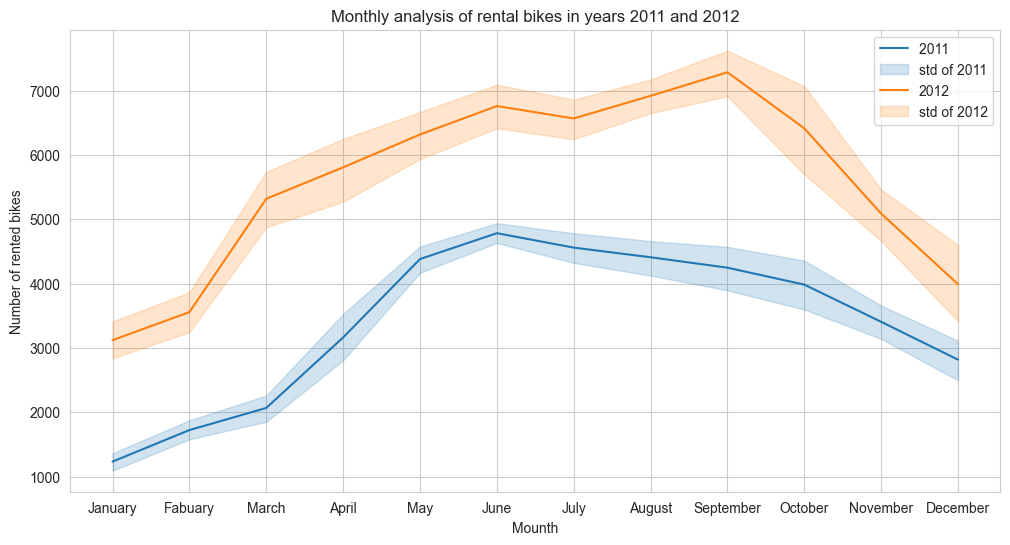

In [68]:
fig=plt.figure(figsize=(12,6))
ax = plt.axes()

l=df1.year.unique()
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(labels=['January','Fabuary','March','April','May','June','July','August','September','October','November','December'])

for i in range(len(df1.year.unique())):
    sns.lineplot(x=df1['month'][df1['year']==l[i]], y=df1['cnt'][df1['year']==l[i]])



plt.legend(['2011 ','std of 2011','2012','std of 2012'])
plt.xlabel('Mounth')
plt.ylabel('Number of rented bikes')

plt.title('Monthly analysis of rental bikes in years 2011 and 2012')


Plot of monthly analysis of rental bikes for casual users in years 2011 and 2012

Text(0.5, 1.0, 'Monthly analysis of rental bikes for casual users in years 2011 and 2012')

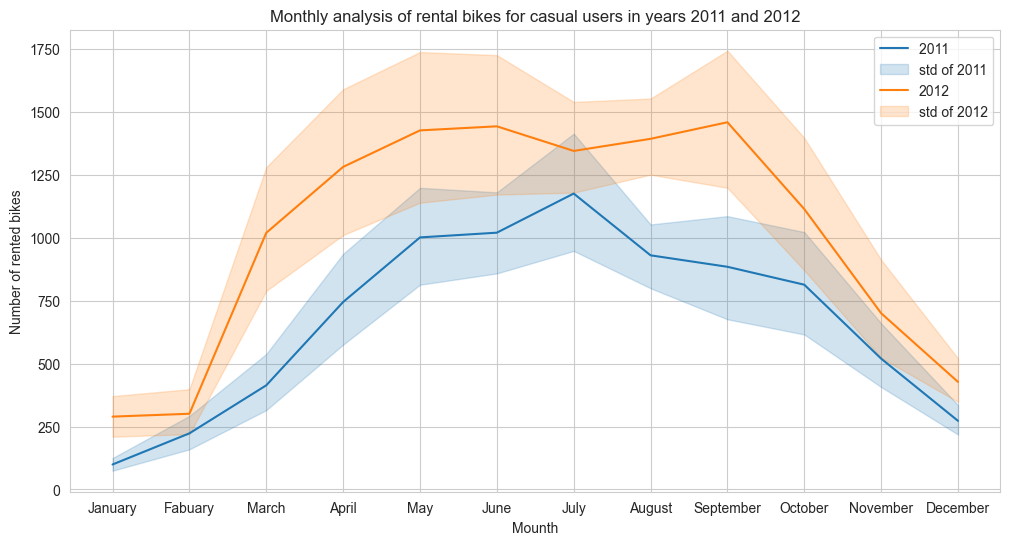

In [69]:
fig=plt.figure(figsize=(12,6))
ax = plt.axes()

l=df1.year.unique()
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(labels=['January','Fabuary','March','April','May','June','July','August','September','October','November','December'])


for i in range(len(df1.year.unique())):
    sns.lineplot(x=df1['month'][df1['year']==l[i]], y=df1['casual'][df1['year']==l[i]])



plt.legend(['2011 ','std of 2011','2012','std of 2012'])
plt.xlabel('Mounth')
plt.ylabel('Number of rented bikes')
plt.title('Monthly analysis of rental bikes for casual users in years 2011 and 2012')

Plot of monthly analysis of rental bikes for registered users in years 2011 and 2012

Text(0.5, 1.0, 'Monthly analysis of rental bikes for registered users in years 2011 and 2012')

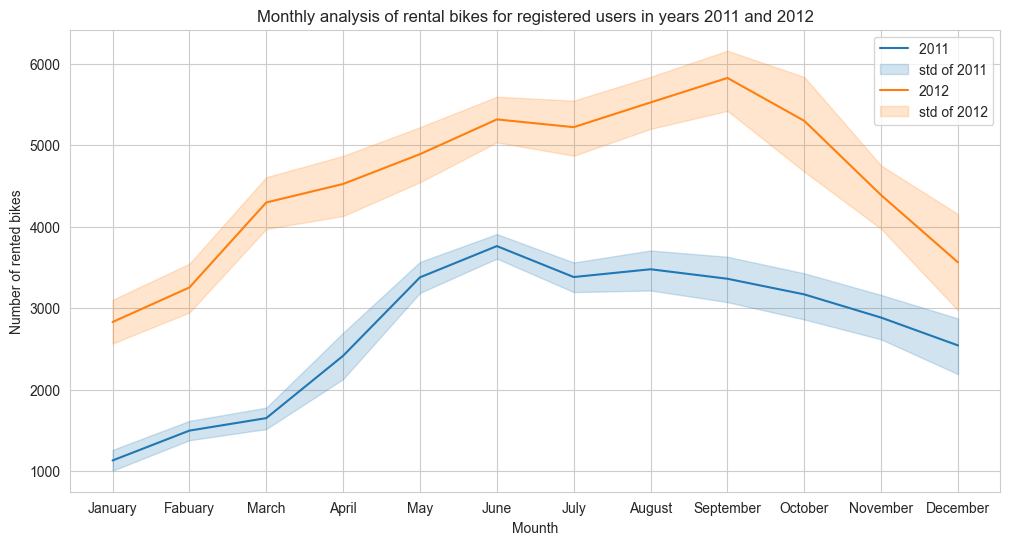

In [70]:
fig=plt.figure(figsize=(12,6))
ax = plt.axes()

l=df1.year.unique()
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(labels=['January','Fabuary','March','April','May','June','July','August','September','October','November','December'])


for i in range(len(df1.year.unique())):
    sns.lineplot(x=df1['month'][df1['year']==l[i]], y=df1['registered'][df1['year']==l[i]], estimator='mean')



plt.legend(['2011 ','std of 2011','2012','std of 2012'])
plt.xlabel('Mounth')
plt.ylabel('Number of rented bikes')
plt.title('Monthly analysis of rental bikes for registered users in years 2011 and 2012')

Plot of monthly analysis of rental bikes for registered users in years 2011 and 2012 (sum of number)

Text(0.5, 1.0, 'Monthly analysis of rental bikes for registered users in years 2011 and 2012')

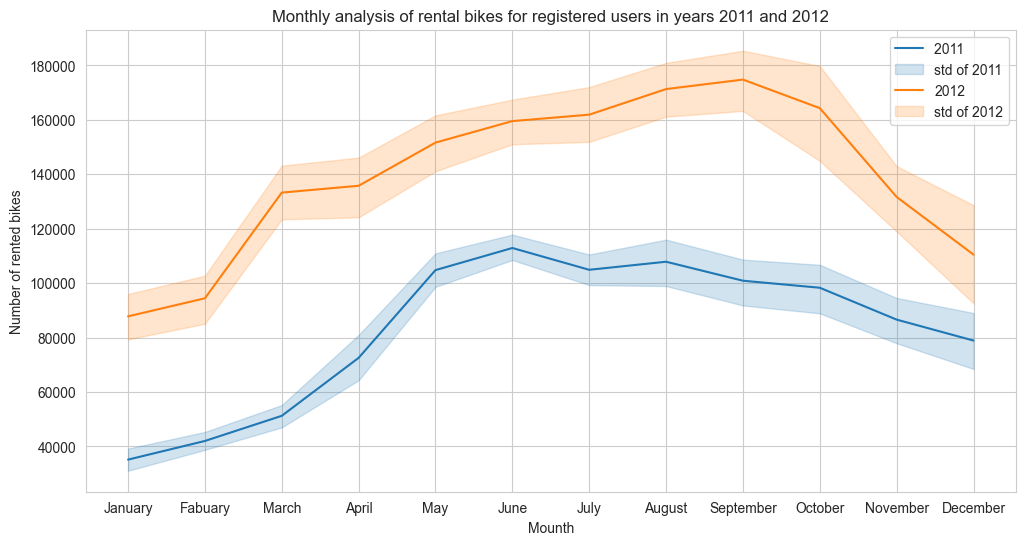

In [71]:
fig=plt.figure(figsize=(12,6))
ax = plt.axes()

l=df1.year.unique()
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(labels=['January','Fabuary','March','April','May','June','July','August','September','October','November','December'])


for i in range(len(df1.year.unique())):
    sns.lineplot(x=df1['month'][df1['year']==l[i]], y=df1['registered'][df1['year']==l[i]], estimator='sum')



plt.legend(['2011 ','std of 2011','2012','std of 2012'])
plt.xlabel('Mounth')
plt.ylabel('Number of rented bikes')
plt.title('Monthly analysis of rental bikes for registered users in years 2011 and 2012')

Plot of monthly analysis of rental bikes for registered users 

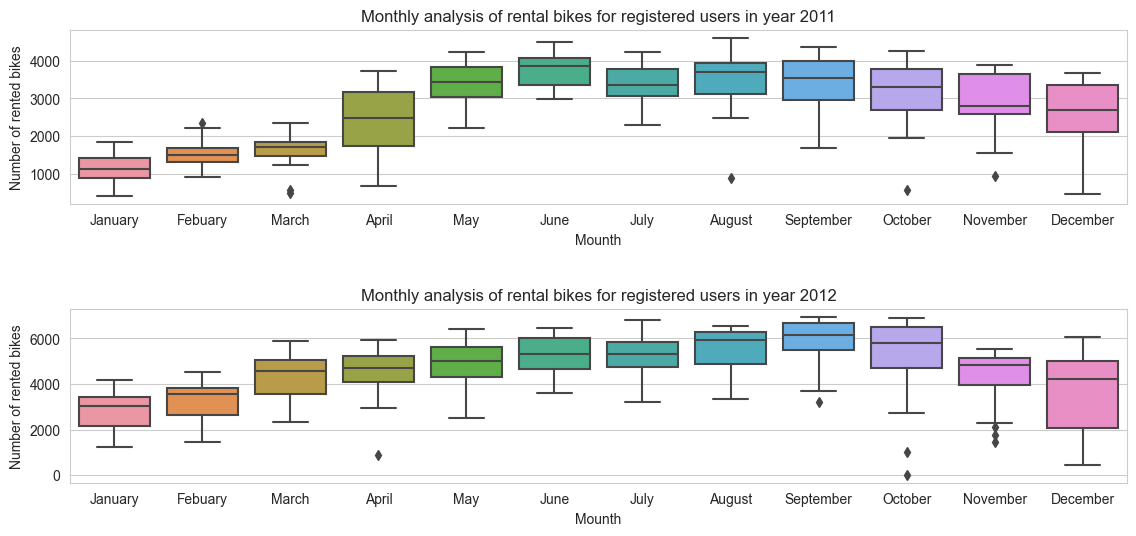

In [72]:
fig=plt.figure(figsize=(12,6))

l=df1.year.unique()
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(labels=['January','Fabuary','March','April','May','June','July','August','September','October','November','December'])


for i in range(len(df1.year.unique())):
    fig= plt.subplot2grid((2,1),(i,0))

    #ax.set_xticks(np.arange(1,13))
    #ax.set_xticklabels(labels=['January','Fabuary','March','April','May','June','July','August','September','October','November','December'])

    sns.boxplot(x=df1['month'][df1['year']==l[i]], y=df1['registered'][df1['year']==l[i]])
    plt.xlabel('Mounth')
    plt.ylabel('Number of rented bikes')
    plt.title('Monthly analysis of rental bikes for registered users in year {}'.format(l[i]))
    plt.xticks(range(0,12), labels=['January','Febuary','March','April','May','June','July','August','September','October','November', 'December'])

    plt.tight_layout(pad=3)






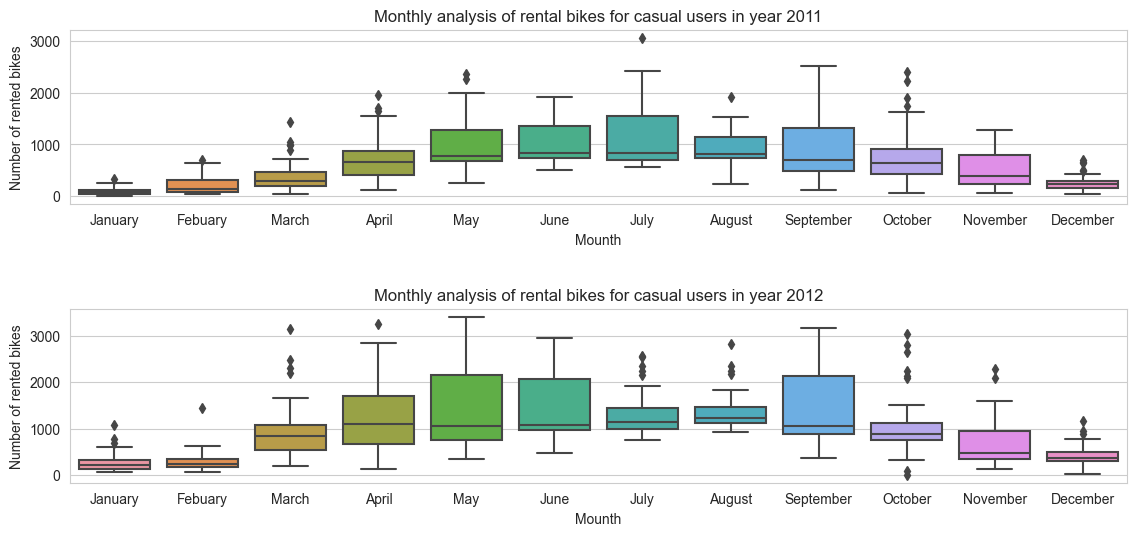

In [73]:
fig=plt.figure(figsize=(12,6))

l=df1.year.unique()
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(labels=['January','Fabuary','March','April','May','June','July','August','September','October','November','December'])


for i in range(len(df1.year.unique())):
    fig= plt.subplot2grid((2,1),(i,0))

    #ax.set_xticks(np.arange(1,13))
    #ax.set_xticklabels(labels=['January','Fabuary','March','April','May','June','July','August','September','October','November','December'])

    sns.boxplot(x=df1['month'][df1['year']==l[i]], y=df1['casual'][df1['year']==l[i]])
    plt.xlabel('Mounth')
    plt.ylabel('Number of rented bikes')
    plt.title('Monthly analysis of rental bikes for casual users in year {}'.format(l[i]))
    plt.xticks(range(0,12), labels=['January','Febuary','March','April','May','June','July','August','September','October','November', 'December'])

    plt.tight_layout(pad=3)

In [74]:
df1['day']=df1['dteday'].dt.day

Plot of relation between apparant temperature and number of bike rentals using linear regresion. Here causion is needed in using parameters of regplot. To be sure that linear regresion is a good condidate for the data it is better to have plots with different parameters (here I tested x_bins and x_estimator).

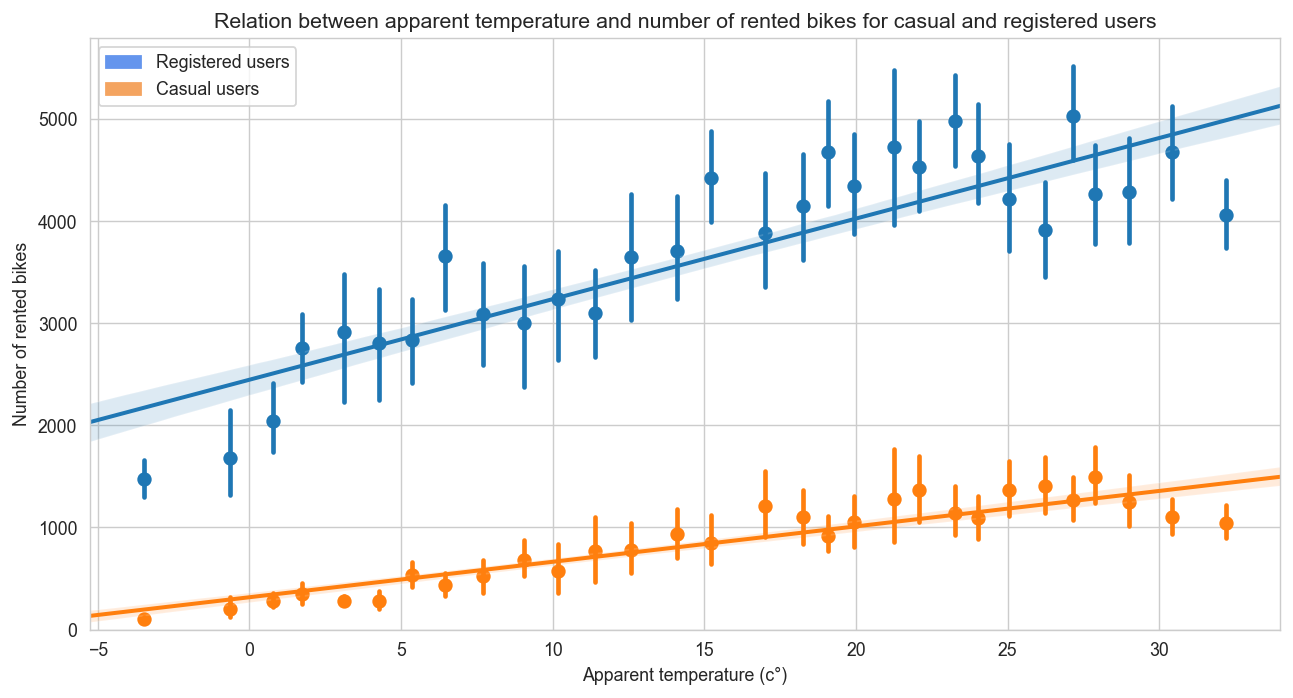

In [75]:
plt.figure(figsize=(12,6), dpi=128)
sns.set_style("whitegrid")
s1 = sns.regplot(x='real_atemp', y='registered', data=df1, ci=95, truncate=False,x_bins=30)
s2 = sns.regplot(x='real_atemp', y='casual', data=df1, ci=95, truncate=False,x_bins=30)
plt.ylim(0)
plt.title('Relation between apparent temperature and number of rented bikes for casual and registered users')
plt.ylabel('Number of rented bikes')
plt.xlabel('Apparent temperature (c°)')
p_a = mpatches.Patch(color='cornflowerblue', label='Registered users')
p_b = mpatches.Patch(color='sandybrown', label='Casual users')
plt.legend(handles=[p_a,p_b])



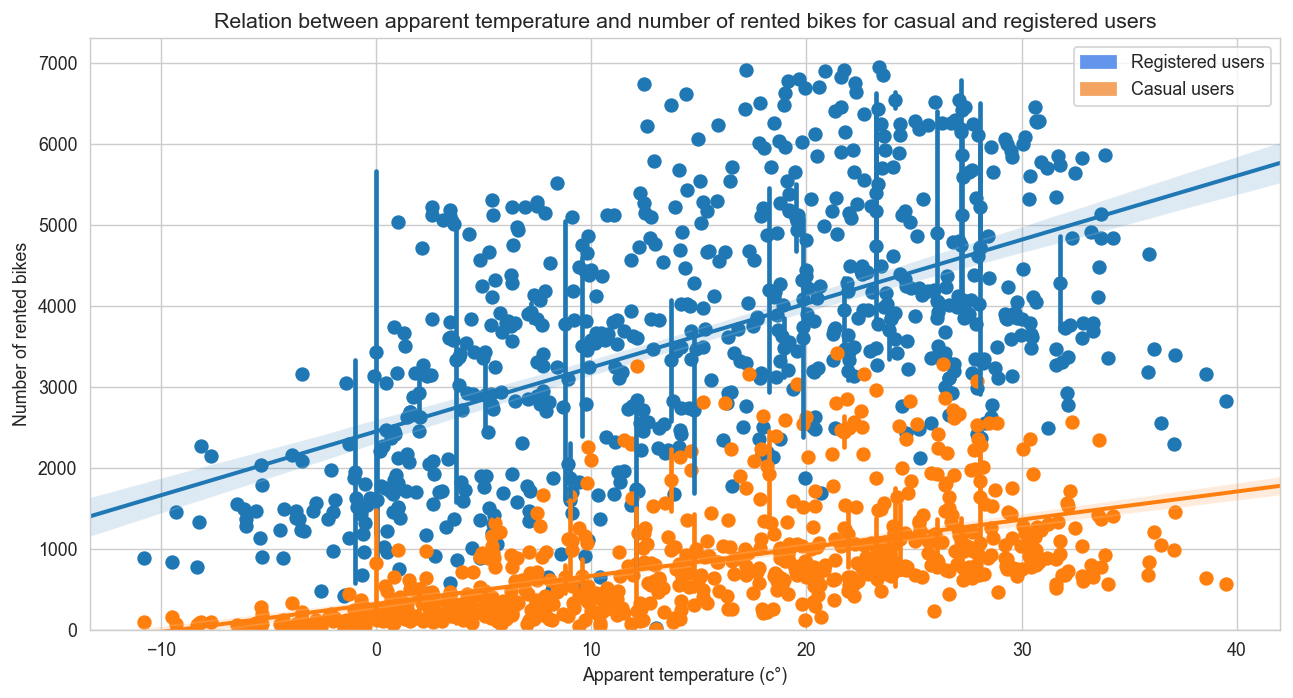

In [76]:
plt.figure(figsize=(12,6), dpi=128)
sns.set_style("whitegrid")
s1 = sns.regplot(x='real_atemp', y='registered', data=df1, ci=95, truncate=False,x_estimator=np.mean)
s2 = sns.regplot(x='real_atemp', y='casual', data=df1, ci=95, truncate=False,x_estimator=np.mean)
plt.ylim(0)
plt.title('Relation between apparent temperature and number of rented bikes for casual and registered users')
plt.ylabel('Number of rented bikes')
plt.xlabel('Apparent temperature (c°)')
p_a = mpatches.Patch(color='cornflowerblue', label='Registered users')
p_b = mpatches.Patch(color='sandybrown', label='Casual users')
plt.legend(handles=[p_a,p_b])

Plot of relation between humidity and number of bike rentals using linear regresion. Here causion is needed in using parameters of regplot. To be sure that linear regresion is a good condidate for the data it is better to have plots with different parameters (here I tested x_bins and x_estimator).

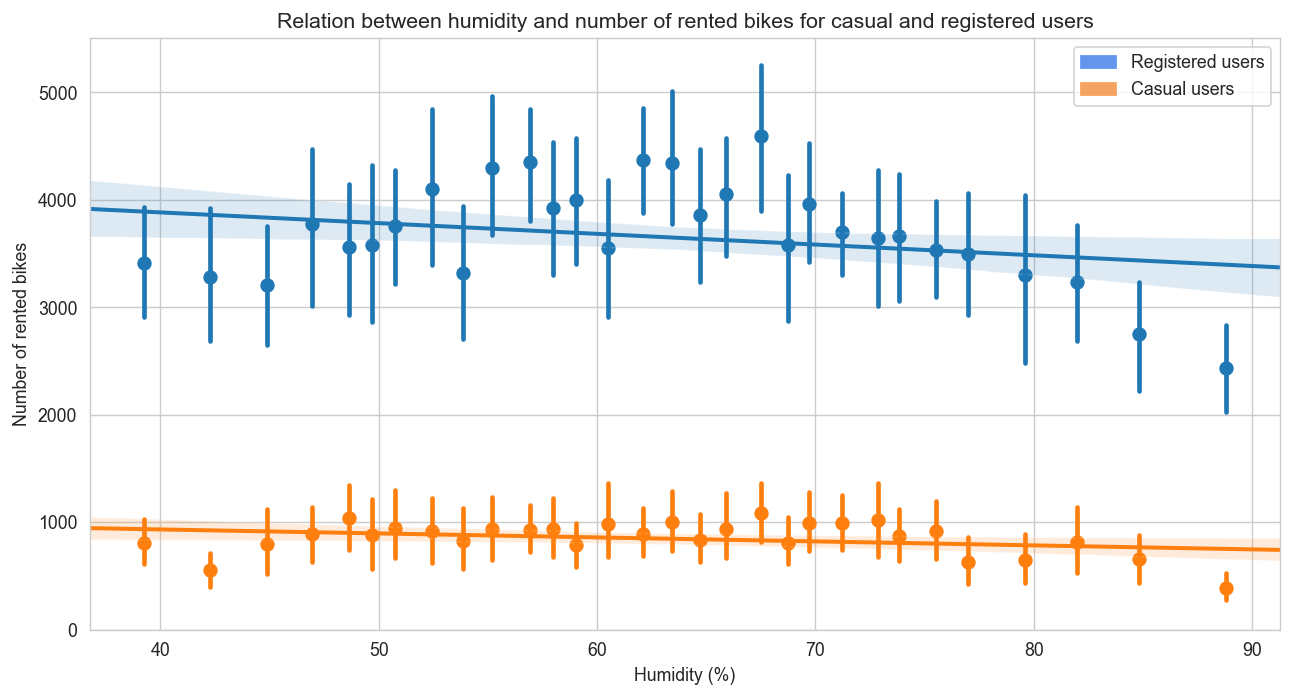

In [77]:
plt.figure(figsize=(12,6), dpi=128)
sns.set_style("whitegrid")
s1 = sns.regplot(x='real_hum', y='registered', data=df1, ci=95, truncate=False,x_bins=30)
s2 = sns.regplot(x='real_hum', y='casual', data=df1, ci=95, truncate=False,x_bins=30)
plt.ylim(0)
plt.title('Relation between humidity and number of rented bikes for casual and registered users')
plt.ylabel('Number of rented bikes')
plt.xlabel('Humidity (%)')
p_a = mpatches.Patch(color='cornflowerblue', label='Registered users')
p_b = mpatches.Patch(color='sandybrown', label='Casual users')
plt.legend(handles=[p_a,p_b])


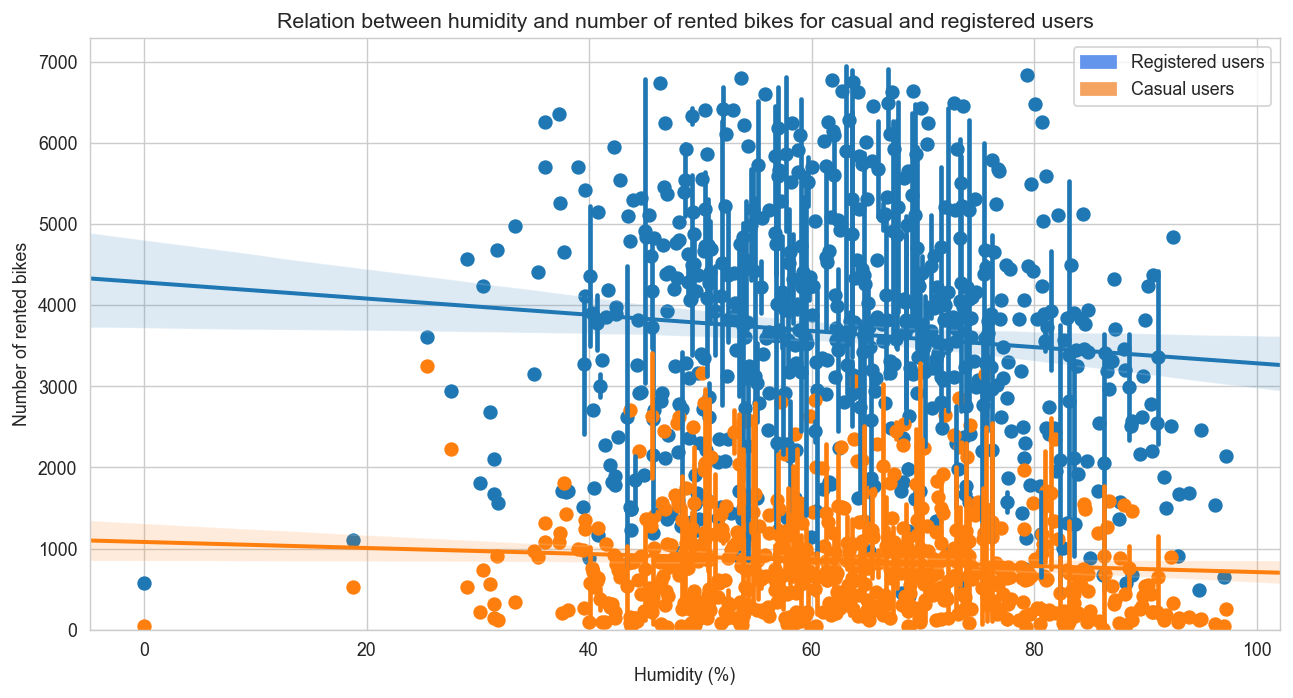

In [78]:
plt.figure(figsize=(12,6), dpi=128)
sns.set_style("whitegrid")
s1 = sns.regplot(x='real_hum', y='registered', data=df1, ci=95, truncate=False,x_estimator=np.mean)
s2 = sns.regplot(x='real_hum', y='casual', data=df1, ci=95, truncate=False,x_estimator=np.mean)
plt.ylim(0)
plt.title('Relation between humidity and number of rented bikes for casual and registered users')
plt.ylabel('Number of rented bikes')
plt.xlabel('Humidity (%)')
p_a = mpatches.Patch(color='cornflowerblue', label='Registered users')
p_b = mpatches.Patch(color='sandybrown', label='Casual users')
plt.legend(handles=[p_a,p_b])

Plot of relation between wind speed and number of bike rentals using linear regresion. Here causion is needed in using parameters of regplot. To be sure that linear regresion is a good condidate for the data it is better to have plots with different parameters (here I tested x_bins and x_estimator). Here by looking at the second plot, it is clear that linear regresion is not a good option.

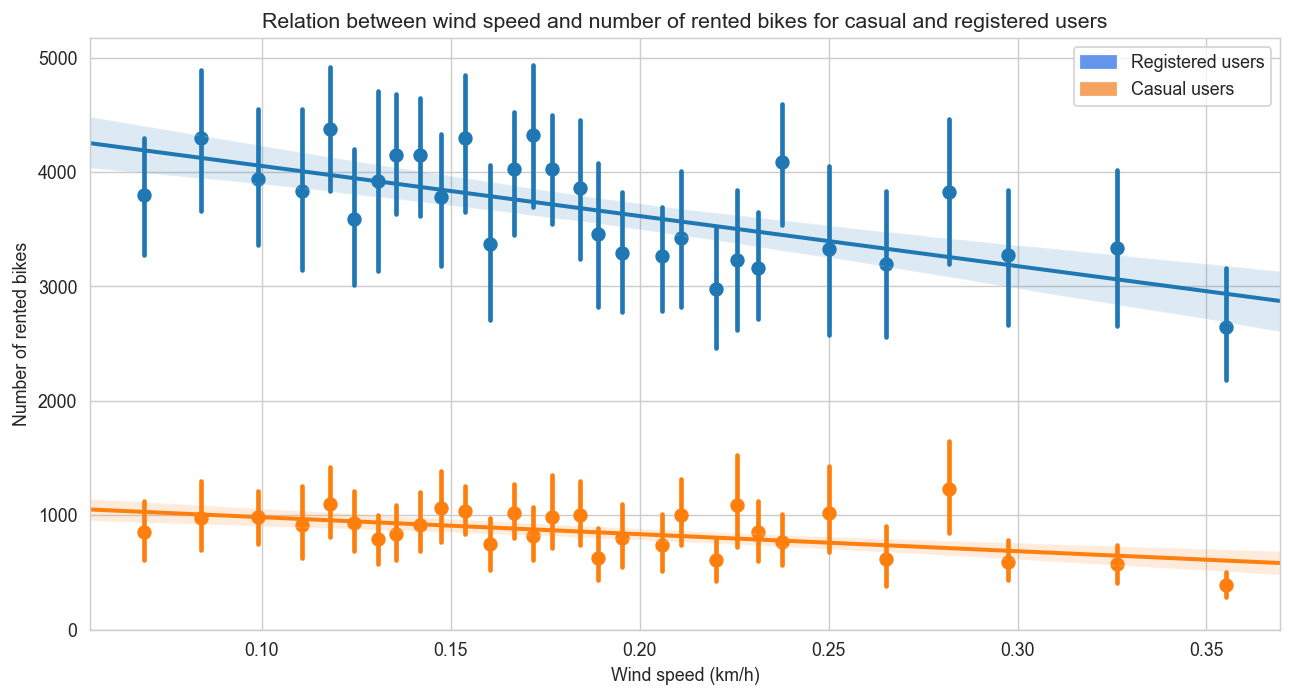

In [79]:
plt.figure(figsize=(12,6), dpi=128)
sns.set_style("whitegrid")
s1 = sns.regplot(x='windspeed', y='registered', data=df1, ci=95, truncate=False,x_bins=30)
s2 = sns.regplot(x='windspeed', y='casual', data=df1, ci=95, truncate=False,x_bins=30)
plt.ylim(0)
plt.title('Relation between wind speed and number of rented bikes for casual and registered users')
plt.ylabel('Number of rented bikes')
plt.xlabel('Wind speed (km/h)')
p_a = mpatches.Patch(color='cornflowerblue', label='Registered users')
p_b = mpatches.Patch(color='sandybrown', label='Casual users')
plt.legend(handles=[p_a,p_b])

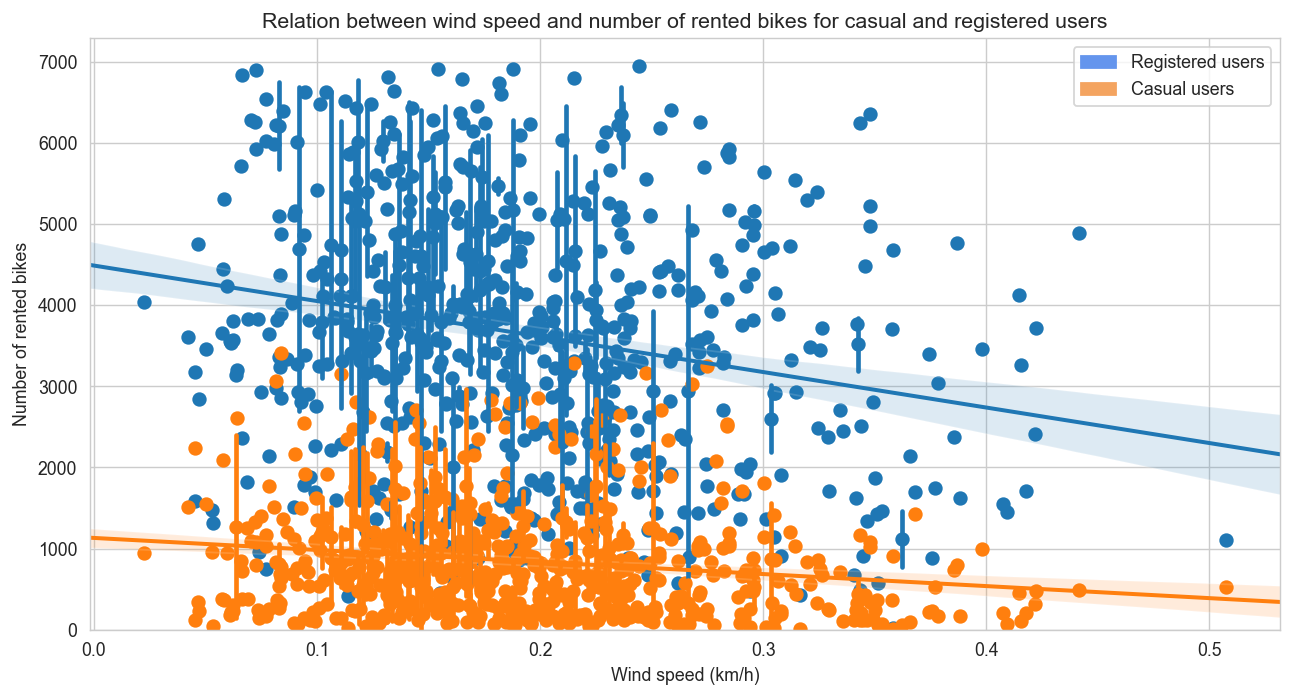

In [80]:
plt.figure(figsize=(12,6), dpi=128)
sns.set_style("whitegrid")
s1 = sns.regplot(x='windspeed', y='registered', data=df1, ci=95, truncate=False,x_estimator=np.mean)
s2 = sns.regplot(x='windspeed', y='casual', data=df1, ci=95, truncate=False,x_estimator=np.mean)
plt.ylim(0)
plt.title('Relation between wind speed and number of rented bikes for casual and registered users')
plt.ylabel('Number of rented bikes')
plt.xlabel('Wind speed (km/h)')
p_a = mpatches.Patch(color='cornflowerblue', label='Registered users')
p_b = mpatches.Patch(color='sandybrown', label='Casual users')
plt.legend(handles=[p_a,p_b])


Plot of yearly analysis of rental bikes for registered users in years 2011 and 2012

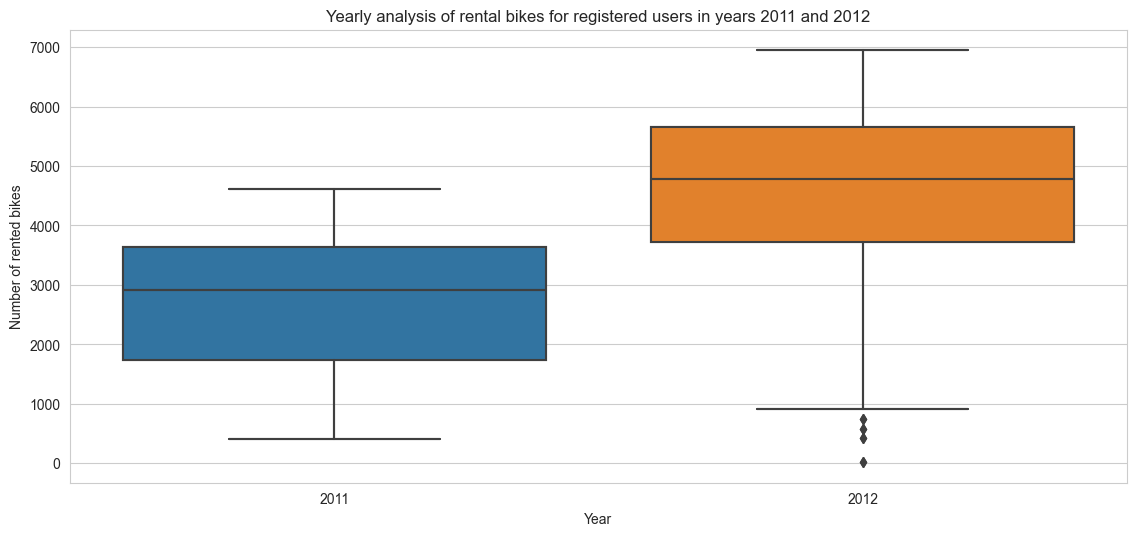

In [81]:
fig=plt.figure(figsize=(12,6))

l=df1.year.unique()
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(labels=['January','Fabuary','March','April','May','June','July','August','September','October','November','December'])


for i in range(len(df1.year.unique())):
 
    sns.boxplot(x=df1['year'], y=df1['registered'])
    plt.xlabel('Year')
    plt.ylabel('Number of rented bikes')
    plt.title('Yearly analysis of rental bikes for registered users in years 2011 and 2012') 
    plt.tight_layout(pad=3)

Create a time serise from the dataset (aggregate the monthly data based on their mean)

In [82]:
import datetime

l=[]
count=2011
for c in range(2):
    count+=c
    for i in range(12):
        l.append(df1['cnt'][(df1['month']==i+1) & (df1['year']==count)].agg('mean'))




#min_month = "2011-01"
#max_month = "2012-12"

#months = pd.period_range(min_month, max_month, freq='M')
months=['2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12'
,'2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12']
df3=pd.DataFrame({'date': months,'cnt':l})

df3['date']=pd.to_datetime(df3['date'])
df3

date          cnt
0  2011-01-01  1231.903226
1  2011-02-01  1721.964286
2  2011-03-01  2065.967742
3  2011-04-01  3162.333333
4  2011-05-01  4381.322581
5  2011-06-01  4783.733333
6  2011-07-01  4559.387097
7  2011-08-01  4409.387097
8  2011-09-01  4247.266667
9  2011-10-01  3984.225806
10 2011-11-01  3405.566667
11 2011-12-01  2816.870968
12 2012-01-01  3120.774194
13 2012-02-01  3556.448276
14 2012-03-01  5318.548387
15 2012-04-01  5807.466667
16 2012-05-01  6318.225806
17 2012-06-01  6761.000000
18 2012-07-01  6567.967742
19 2012-08-01  6919.451613
20 2012-09-01  7285.766667
21 2012-10-01  6414.225806
22 2012-11-01  5088.800000
23 2012-12-01  3990.741935

Ploting time series

Text(0, 0.5, 'Total number of rented bikes')

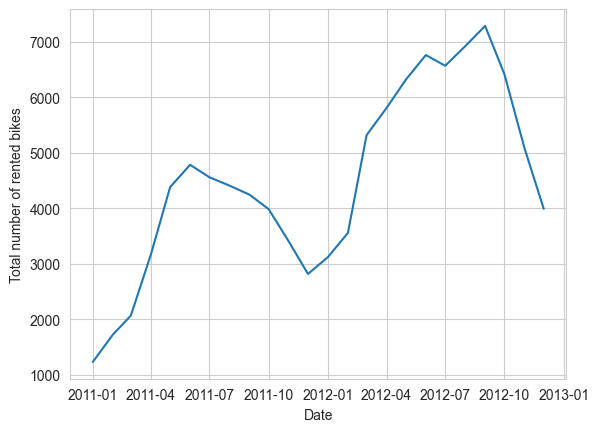

In [83]:

plt.plot(df3['date'],df3['cnt'])
plt.xlabel('Date')
plt.ylabel('Total number of rented bikes')

In [84]:
df3.set_index('date', inplace=True,drop=False)
df3=df3.drop('date',axis=1)


Ploting trend, seasonality and residual of dataset

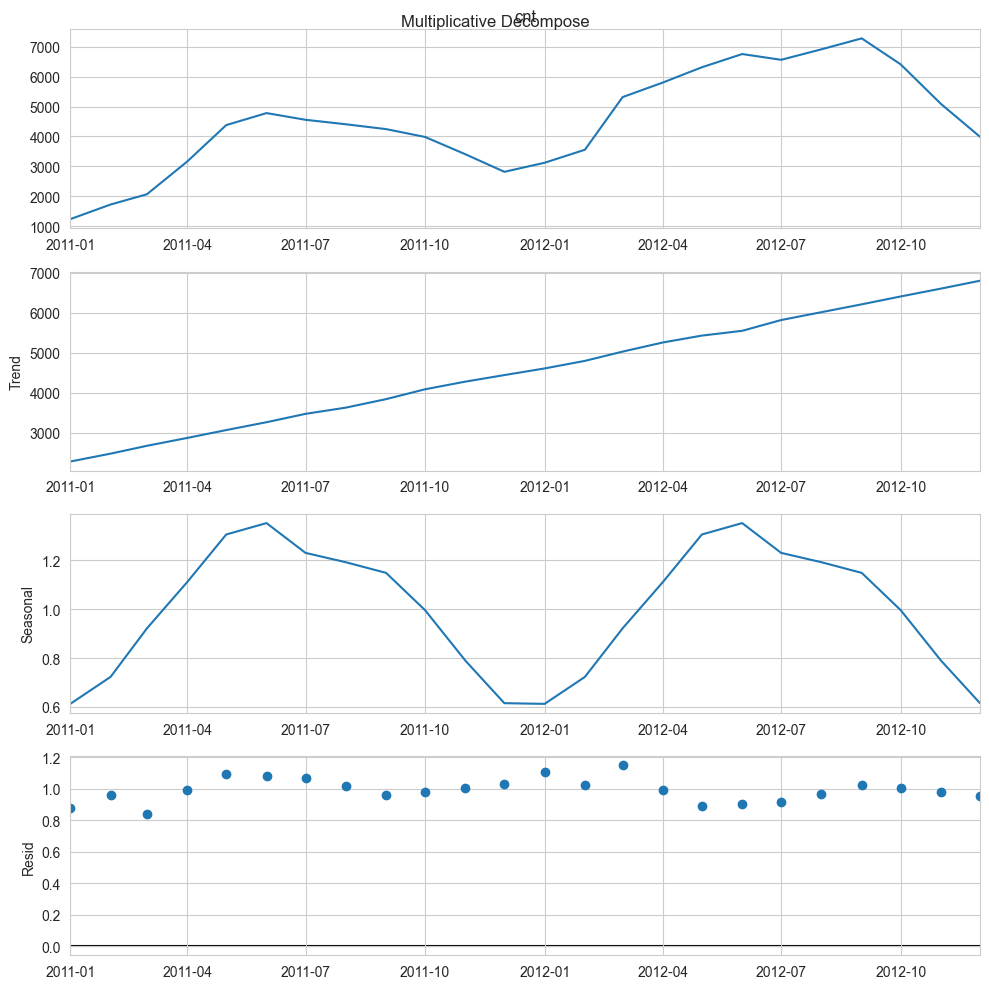

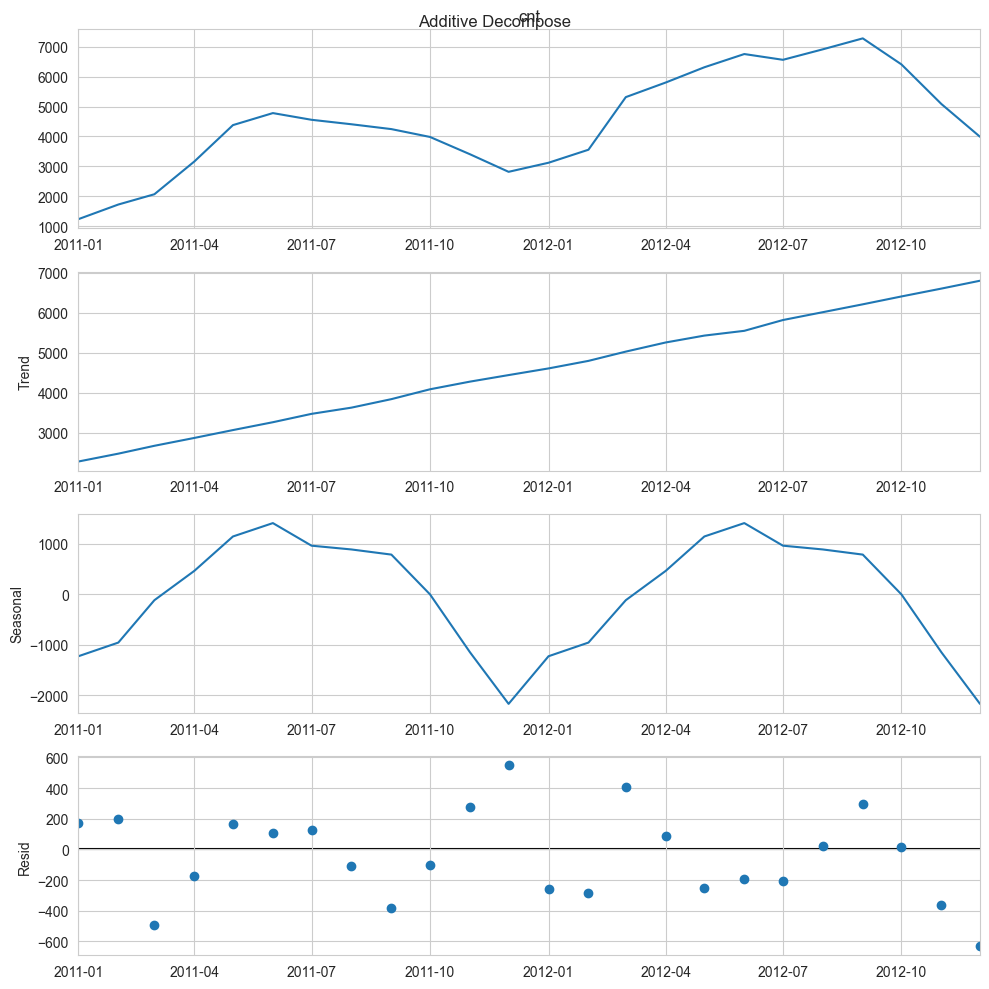

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df3['cnt'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df3['cnt'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=12)
result_add.plot().suptitle('Additive Decompose', fontsize=12)
plt.show()

Creating a dataframe from trend, seasonality, residualand time series

In [86]:
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seasonality', 'trend', 'residuals', 'time_series']
df_reconstructed.head()

seasonality        trend  residuals  time_series
date                                                        
2011-01-01     0.612750  2287.806412   0.878768  1231.903226
2011-02-01     0.723172  2483.809506   0.958659  1721.964286
2011-03-01     0.921783  2679.812599   0.836355  2065.967742
2011-04-01     1.111250  2875.815693   0.989543  3162.333333
2011-05-01     1.305769  3071.818787   1.092303  4381.322581

KSPP and ADF tests for testing whether time series is stationary or not

In [87]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df3.cnt.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df3.cnt.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.4933638158728244
p-value: 0.11709734082945816
Critial Values:
   1%, -3.769732625845229
Critial Values:
   5%, -3.005425537190083
Critial Values:
   10%, -2.6425009917355373

KPSS Statistic: 0.476043
p-value: 0.047062
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


Removing trend

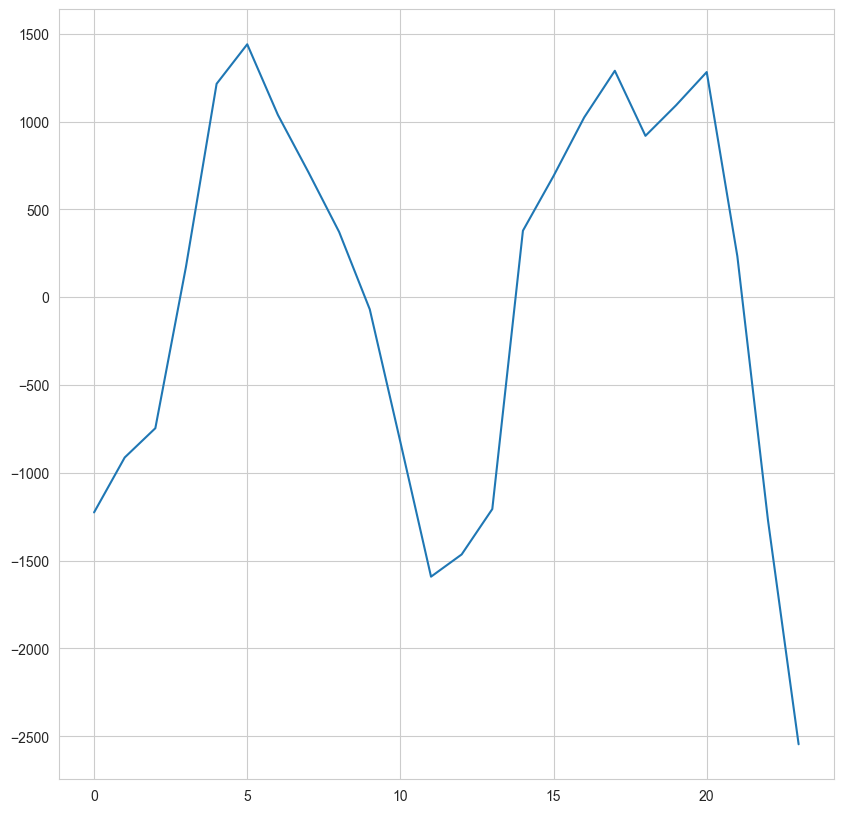

In [88]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df3.cnt.values)
plt.plot(detrended)

removing seasonality

/var/folders/nm/btrww2_94pncl34mb0yt49j80000gn/T/ipykernel_85531/1445271923.py:1: RuntimeWarning:

invalid value encountered in log



[]

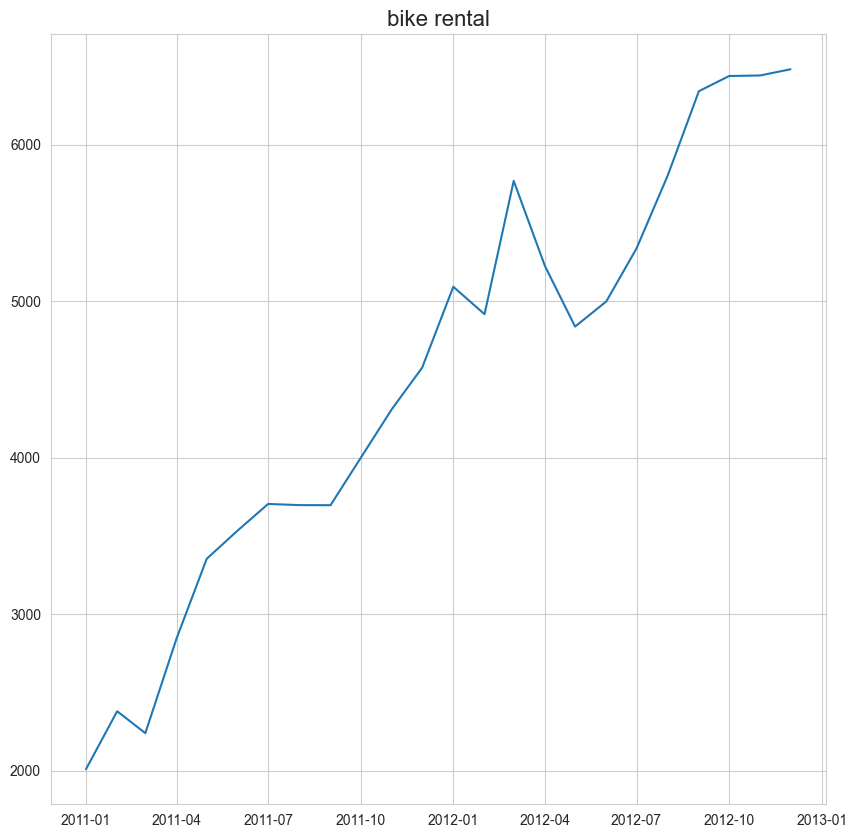

In [89]:
detrended_log=np.log(detrended)
# Time Series Decomposition
result_mul = seasonal_decompose(df3['cnt'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df3.cnt.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('bike rental', fontsize=16)
plt.plot()

Another way to remove the trend

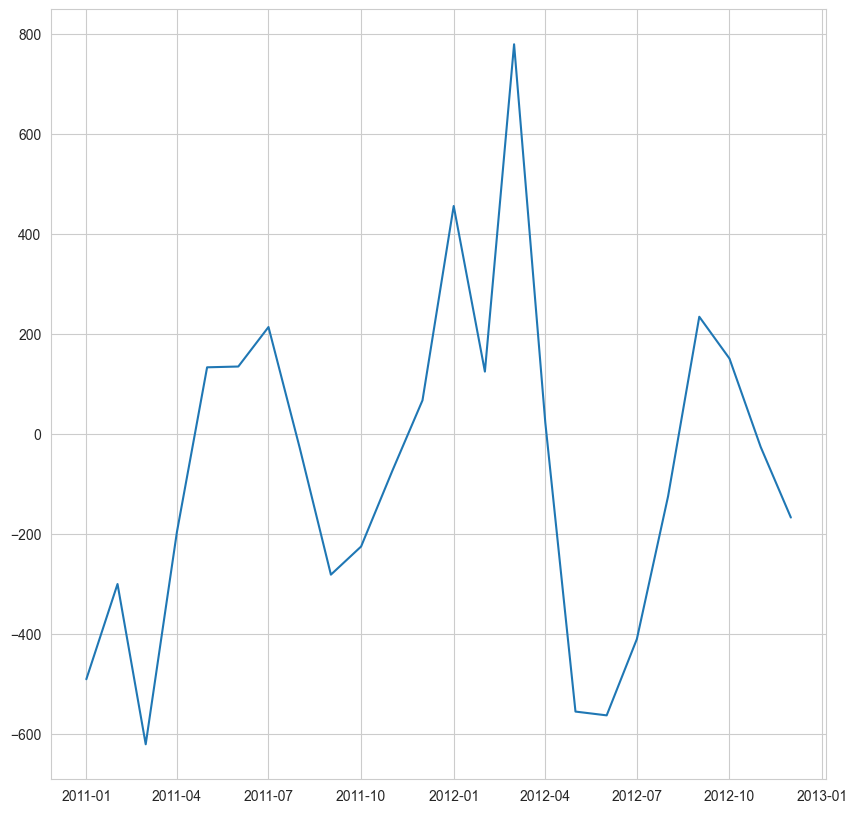

In [90]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(deseasonalized, model='multiplicative', extrapolate_trend='freq')
detrended = deseasonalized.values - result_mul.trend
plt.plot(detrended)

Making a datafram with a column named trend

In [91]:
trend_d=pd.DataFrame(detrended)

plot autocorrelation to see seasonality. I plot both detrend and deseasonaled.

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

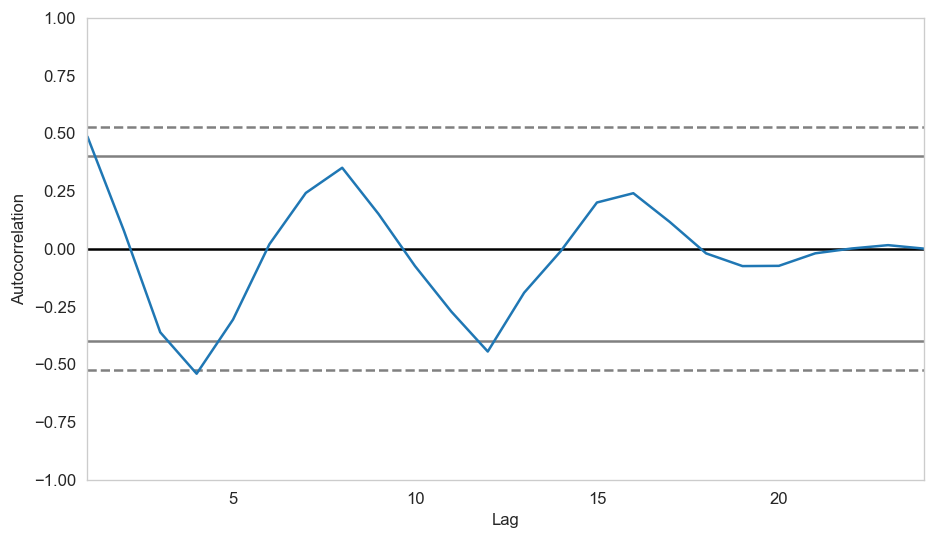

In [92]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(trend_d.trend.tolist())

Making a datafram with a column named seasonal

In [93]:
season_d=pd.DataFrame(deseasonalized)


<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

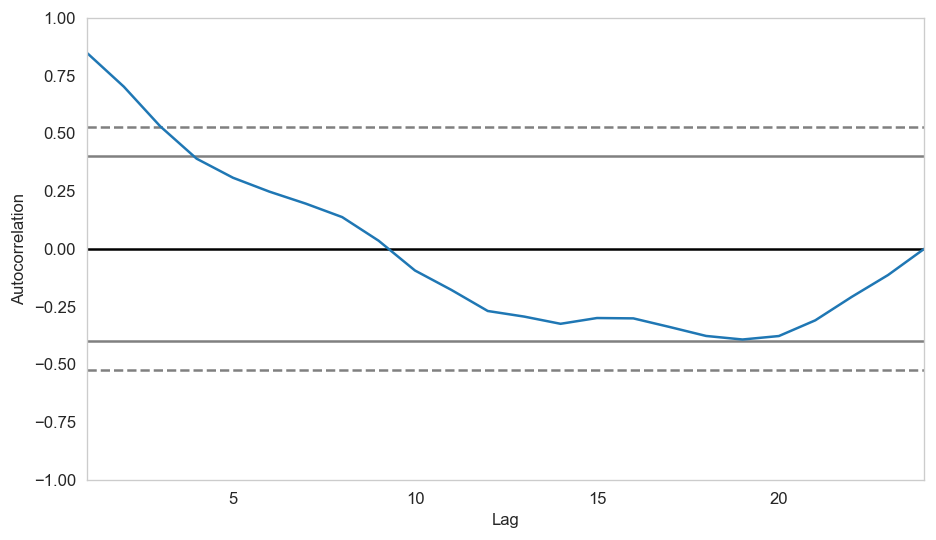

In [94]:

plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(season_d.seasonal.tolist())

ploting autocorrelation and partially autocorrelation functions

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



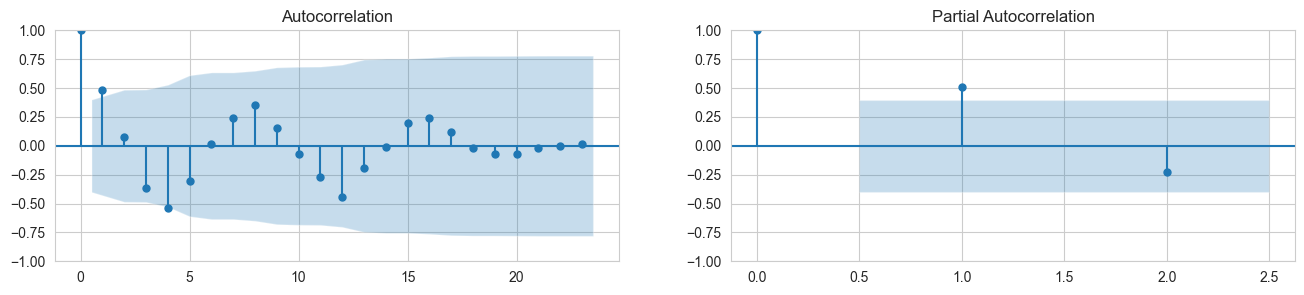

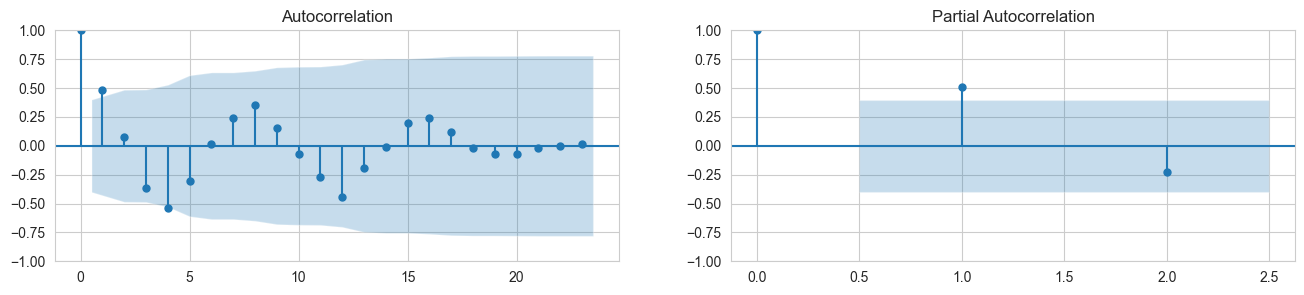

In [95]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(trend_d.trend.tolist(), lags=23, ax=axes[0])
plot_pacf(trend_d.trend.tolist(), lags=2, ax=axes[1])

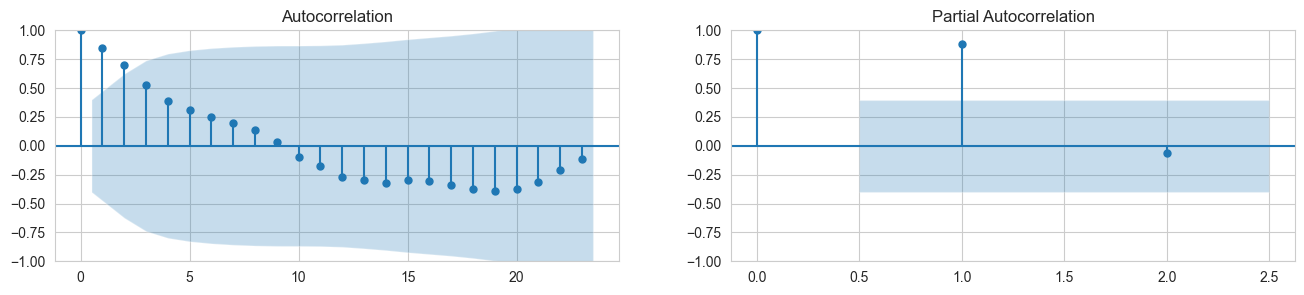

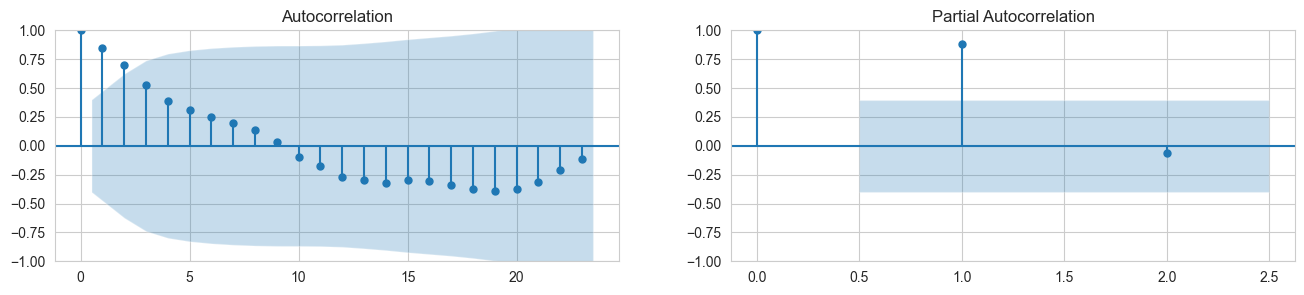

In [96]:

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(season_d.seasonal.tolist(), lags=23, ax=axes[0])
plot_pacf(season_d.seasonal.tolist(), lags=2, ax=axes[1])

Plot lags

Text(0.5, 1.0, 'Lag2')

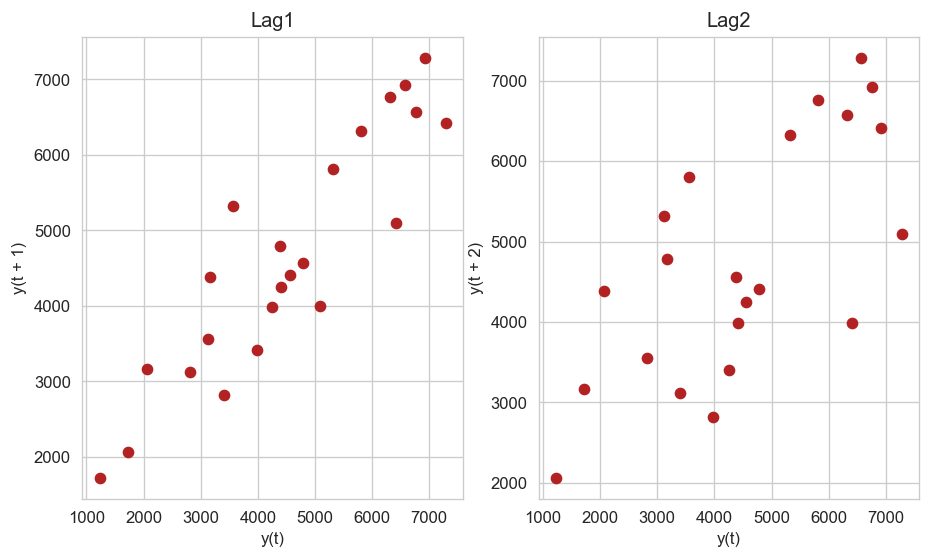

In [97]:
from pandas.plotting import lag_plot
fig=plt.subplot2grid((1,2),(0,0))
lag_plot(df3.cnt, lag=1, c='firebrick')
plt.title('Lag1')
fig=plt.subplot2grid((1,2),(0,1))
lag_plot(df3.cnt, lag=2, c='firebrick')
plt.title('Lag2')


Text(0.5, 1.0, 'Lag2')

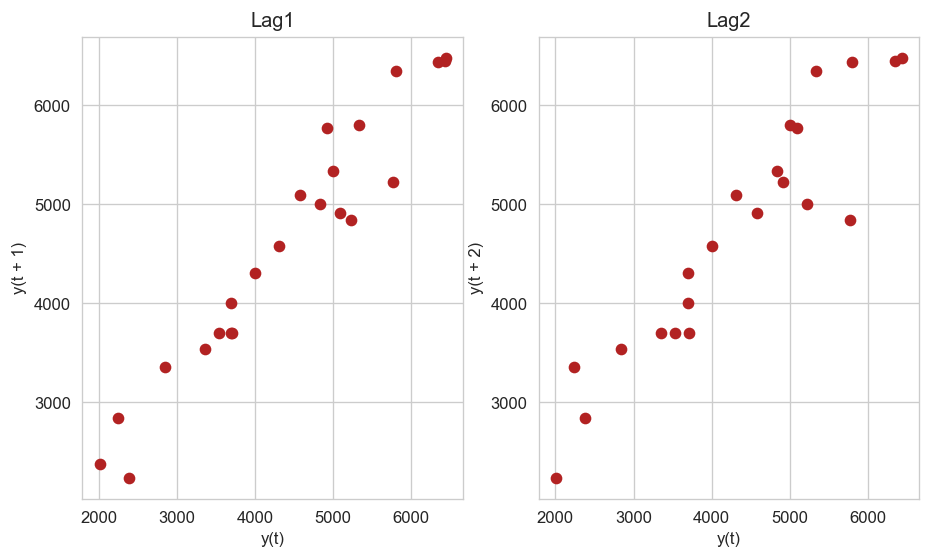

In [98]:
from pandas.plotting import lag_plot
fig=plt.subplot2grid((1,2),(0,0))
lag_plot(season_d.seasonal, lag=1, c='firebrick')
plt.title('Lag1')
fig=plt.subplot2grid((1,2),(0,1))
lag_plot(season_d.seasonal, lag=2, c='firebrick')
plt.title('Lag2')

Check the predictablity of time series using Approximate Entropy. Higher Entropy = no predictibility

In [99]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(df3.cnt, m=2, r=0.2*np.std(df3.cnt)))     

0.05867677427807427


Check predictibility for season_d (df3 after removing trend and seasonality) and trend_d (removing only trend)

In [100]:
print(ApEn(season_d.seasonal, m=2, r=0.2*np.std(season_d.seasonal))) 

0.2646289865706697


In [101]:
print(ApEn(trend_d.trend, m=2, r=0.2*np.std(trend_d.trend))) 

0.01582190530394234


Plot time series again 

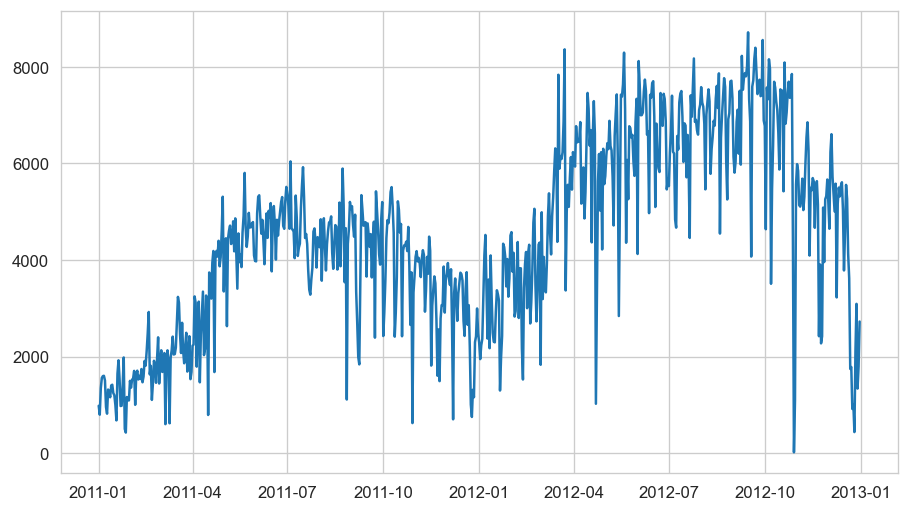

In [102]:
plt.plot(df1['dteday'], df1['cnt'])

Remove noise from the data by smoothen it. Here I use two methods: Lowss and Moving avarage

/var/folders/nm/btrww2_94pncl34mb0yt49j80000gn/T/ipykernel_85531/2977484816.py:13: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



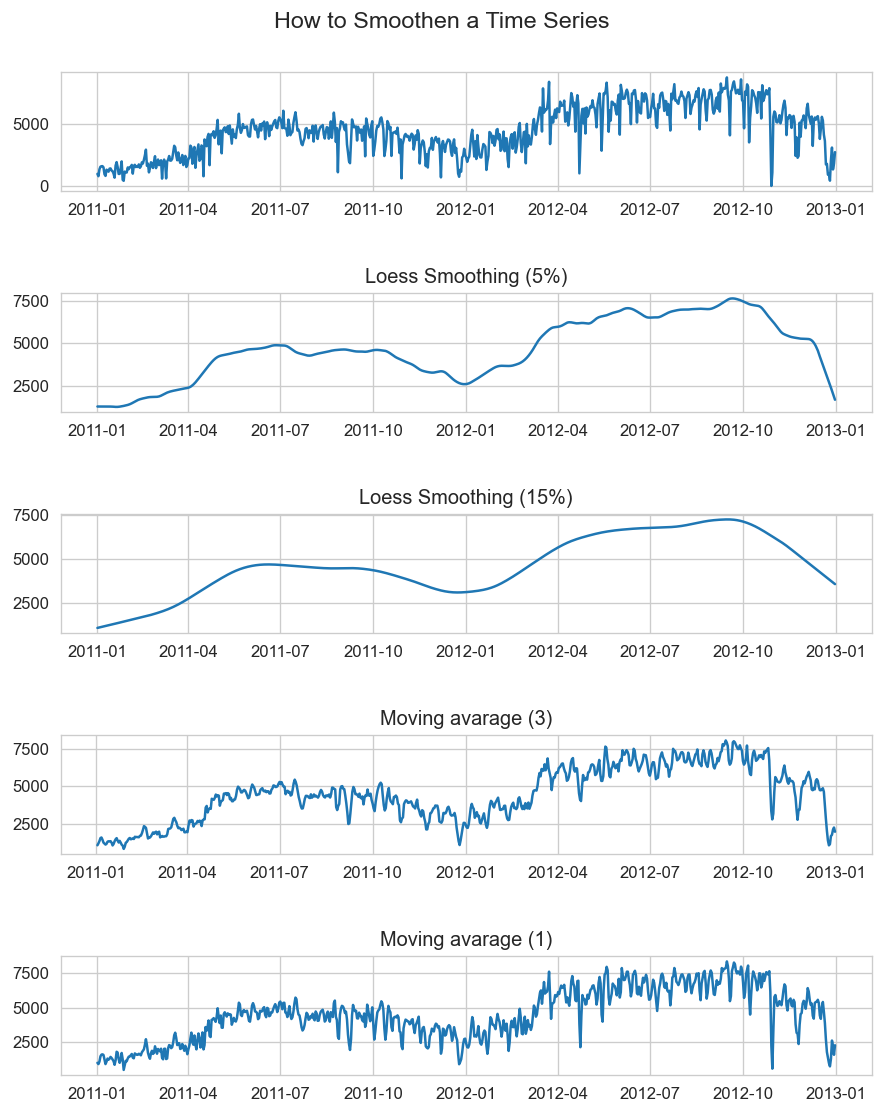

In [103]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Loss Smoothing (5% and 15%)
df_smooth1=pd.DataFrame(lowess(df1.cnt, np.arange(len(df1.cnt)), frac=0.05)[:, 1], index=df1.index, columns=['cnt'])
df_smooth2=pd.DataFrame(lowess(df1.cnt, np.arange(len(df1.cnt)), frac=0.15)[:, 1], index=df1.index, columns=['cnt'])
# Moving avarage
df_smooth3=df1.cnt.rolling(3, center=True, closed='both').mean().dropna()
df_smooth4=df1.cnt.rolling(1, center=True, closed='both').mean().dropna()

# plot
fig=plt.figure(figsize=(8,10))
plt.title('Original Time series')
plt.subplot2grid((5,1),(0,0))
plt.plot(df1['dteday'],df1['cnt'])
plt.subplot2grid((5,1),(1,0))
plt.title('Loess Smoothing (5%)')

plt.plot(df1['dteday'],df_smooth1['cnt'])
plt.subplot2grid((5,1),(2,0))
plt.title('Loess Smoothing (15%)')

plt.plot(df1['dteday'],df_smooth2['cnt'])
plt.subplot2grid((5,1),(3,0))
plt.title('Moving avarage (3)')
plt.plot(df1['dteday'][df1.index !=0 ],df_smooth3.iloc[:])
plt.subplot2grid((5,1),(4,0))
plt.title('Moving avarage (1)')
plt.plot(df1['dteday'],df_smooth4.iloc[:])
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.tight_layout(pad=3)
plt.show()

Test  if month time series will be useful to forecast cnt. The null hypothesys is it is not. If p is less than significant level (0.05), then we can reject it. 

In [104]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df1[['cnt', 'mnth']], maxlag=2)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.8772 , p=0.0001  , df_denom=727, df_num=1
ssr based chi2 test:   chi2=14.9386 , p=0.0001  , df=1
likelihood ratio test: chi2=14.7878 , p=0.0001  , df=1
parameter F test:         F=14.8772 , p=0.0001  , df_denom=727, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.6262  , p=0.0101  , df_denom=724, df_num=2
ssr based chi2 test:   chi2=9.3163  , p=0.0095  , df=2
likelihood ratio test: chi2=9.2573  , p=0.0098  , df=2
parameter F test:         F=4.6262  , p=0.0101  , df_denom=724, df_num=2


{1: ({'ssr_ftest': (14.87721635020384, 0.00012491948493173867, 727.0, 1),
   'ssr_chi2test': (14.938607889475657, 0.0001110666574855764, 1),
   'lrtest': (14.78781098660329, 0.00012031064549514267, 1),
   'params_ftest': (14.87721635020376, 0.0001249194849317429, 727.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.626197527643603, 0.010083179700276508, 724.0, 2),
   'ssr_chi2test': (9.316292811193886, 0.00948402565598112, 2),
   'lrtest': (9.25726614836094, 0.009768102251893378, 2),
   'params_ftest': (4.626197527643649, 0.010083179700276508, 724.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}